<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries and Project Variables](#1)
* [2. Reading the Data](#2)
* [3. EDA: Exploring Insights with xplotter](#3)
    - [3.1 TV Shows or Movies](#3.1)
    - [3.2 From the Oldest to the Newest Title](#3.2)
    - [3.3 How Many People Compose the Cast and Who are Them?](#3.3)
    - [3.4 From Where Netlix's Products Come From?](#3.4)
    - [3.5 Movies and TV Shows Duration (Minutes and Seasons)](#3.5)
    - [3.6 Dramas or Comedies? How Are Netflix Titles Listed In?](#3.6)
    - [3.7 Can Netflix Draw our Attention Just by Titles Description?](#3.7)
    - [3.8 Ratings on Netflix Catalog](#3.8)
* [4. Prep: Transforming the Data for a More Insights](#4)
    - [4.1 New Features From "type" Column](#4.1)
    - [4.2 New Features From "director" Column](#4.2)
    - [4.3 New Features From "cast" Column](#4.3)
    - [4.4 New Features From "country" Column](#4.4)
    - [4.5 New Features From "date_added" and "release_year" Columns](#4.5)
    - [4.6 New Features From "listed_in" Column](#4.6)
    - [4.7 New Features From "duration" Column](#4.7)
    - [4.8 Final Preparation](#4.8)
* [5. PCA: Reducing the Multidimensional Space](#5)

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries and Project Variables</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [1]:
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

     |████████████████████████████████| 242 kB 1.3 MB/s 


In [2]:
# Importing libraries
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Maps
import folium
from folium.plugins import Fullscreen
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, country_name_to_country_alpha3, country_alpha2_to_country_name
from geopy.geocoders import Nominatim
import geopandas as gpd

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

In [3]:
# Defining directory variables
DATA_PATH = '../input/netflix-shows'
FILENAME = 'netflix_titles.csv'

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Reading the Data</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [4]:
# Reading the csv file
df = pd.read_csv(os.path.join(DATA_PATH, FILENAME))
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

The dataset has 7787 rows and 12 columns


show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

After defining some useful variables to be used along the project development, the given dataset was read and a first look could be taken on its content. As the project description says, the data consists on the Netflix tv shows and movies catalog of 2019 (or a more recent epoch as long as it's possible to see some tv shows with relase dated of 2020).

Even though, each row of the data has information about a tv show or a movie, like the title, cast, country, duration and others. On this first look, we can get a lot of ideas on how to implement a storytelling for presenting insights about the context.

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. EDA: Exploring Insights with xplotter</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

This topic will be responsible for allocating efforts on gathering insights from the Netflix data with useful tools built in `xplotter` Python package. As the project goes on, it will be possible to use the functions of `xplotter` for plotting some good charts that can be served for visualizing insights in beautiful and informative ways.

For presenting a good storytelling on this task, let's divide the Exploratory Data Analysis into subtopics, each one consisting on subjects that can generate good discussions and conclusions. So, let's not only write codes and plot charts, but discuss around them and use them as powerful tools for helping us on reaching our analysis goals. Let's go!

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 TV Shows or Movies?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Maybe the first question that can be in mind by looking at the data is: _does Netflix have more more tv shows or movies?_ This is a good question to answear using the data itself. So let's get our hands dirty and use our first function of `xplotter` for plotting a custom chart for looking at the balance between tv shows and movies.

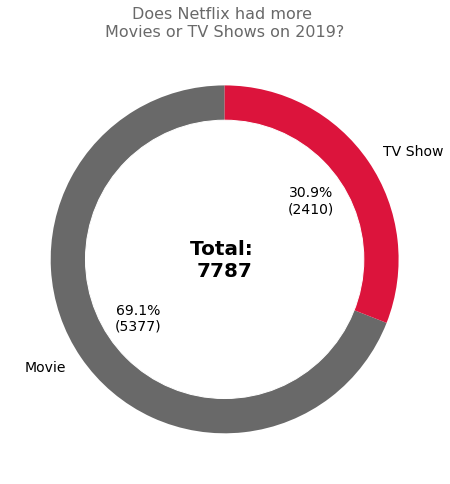

In [5]:
# Balance of Netflix products
plot_donut_chart(df=df, col='type', colors=['dimgrey', 'crimson'],
                 title='Does Netflix had more \nMovies or TV Shows on 2019?')

It seems like Netflix has (or had) more movies than TV shows in a percentage of 69% against 31% approximately. But this lends us to the next question: _this behavior was always like that?_ For ansewaring this question we should have in hands information about previous years of Netflix catalog but, if we take a look at the **date_added** column, maybe we could make an evolution analysis on how the balance of movies and TV shows showed up for Netflix's customers.

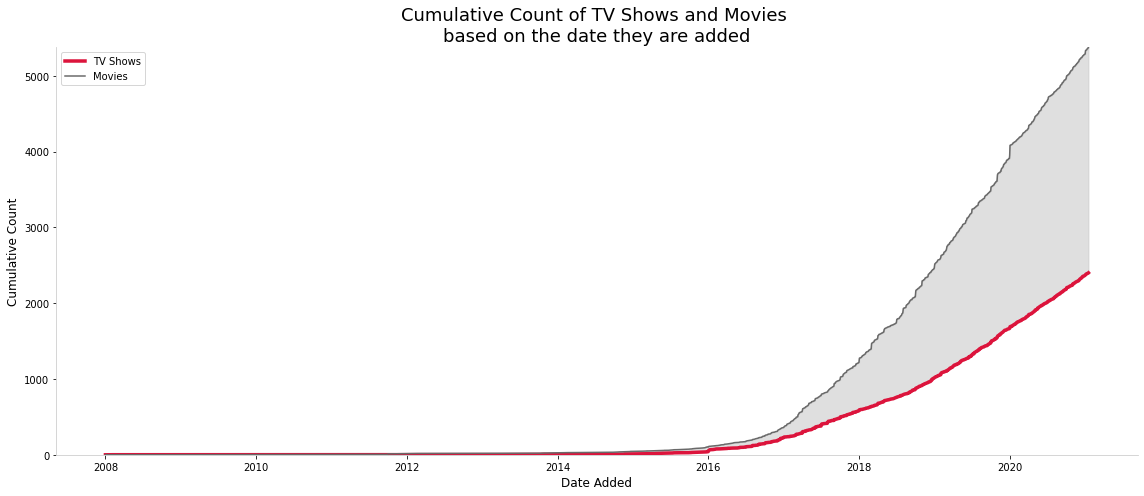

In [6]:
# Creating a new datetime column for date_added info
df_prep = df.copy()
df_prep['date_added_dt'] = pd.to_datetime(df_prep['date_added'])

# Creating new columns for movie type
df_prep['is_tvshow'] = (df_prep['type'] == 'TV Show') * 1
df_prep['is_movie'] = (df_prep['type'] == 'Movie') * 1

# Sorting by date and applying a cumulative sum on type flags
df_prep.sort_values(by='date_added_dt', inplace=True)
df_prep['cumul_tvshow'] = df_prep['is_tvshow'].cumsum()
df_prep['cumul_movie'] = df_prep['is_movie'].cumsum()

# Plotting figure
fig, ax = plt.subplots(figsize=(16, 7))
sns.lineplot(x='date_added_dt', y='cumul_tvshow', data=df_prep, ax=ax, 
             color='crimson', label='TV Shows', linewidth=3.5, markers='x')
sns.lineplot(x='date_added_dt', y='cumul_movie', data=df_prep, ax=ax, 
             color='dimgrey', label='Movies')

# Extracting max y value
max_tvshow = df_prep['cumul_tvshow'].max()
max_movie = df_prep['cumul_movie'].max()
max_ylabel = max_movie if max_movie >= max_tvshow else max_tvshow

# Setting y limit and title
ax.set_ylim(0, max_ylabel)
ax.set_title('Cumulative Count of TV Shows and Movies \nbased on the date they are added', size=18)

# Additional customization
format_spines(ax)
ax.set_ylabel('Cumulative Count', size=12)
ax.set_xlabel('Date Added', size=12)
ax.fill_between(x=df_prep['date_added_dt'], y1=df_prep['cumul_movie'], y2=df_prep['cumul_tvshow'],
                color='silver', alpha=.5)

# Finishing plot
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Well, knowing Netflix as itself, it's not clearly possible to say that the evolution scenario is 100% real. It's said because movies or TV shows can be eliminated from catalog and, as long as the data is consisted of a catalog snapshot from 2019, there's no way to tell if some movies or tv shows were already eliminated in the past.

Meanwhile, the linchart shows us that, in general, considering this catalog snapshot, the presence of movies are always higher than TV shows. By the way, it seems that the cumulative count of movies added on Netflix is increasing faster than the TV show rate.

> **Note:** the cumulative count chart above is something we must investigate a little deeper because it goes to the opposite way to the affirmative: "_In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled._"

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 From the Oldest to the Newest Title</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Well, by looking at the Netflix catalog, one good question to be made is: _how long do usually movies and tv shows last on catalog?_ You may have find yourself looking for a title that isn't on catalog anymore or else you probably got yourself surprised by finding some classical title on the list that you didn't expect.

Using the `date_added` column, let's set up some date for this snapshot (something around max `date_added`) and compute the difference between the date that each title was added do the streaming service and the snapshot date. With this information, it will be possible to see the distribution of titles by its ages.

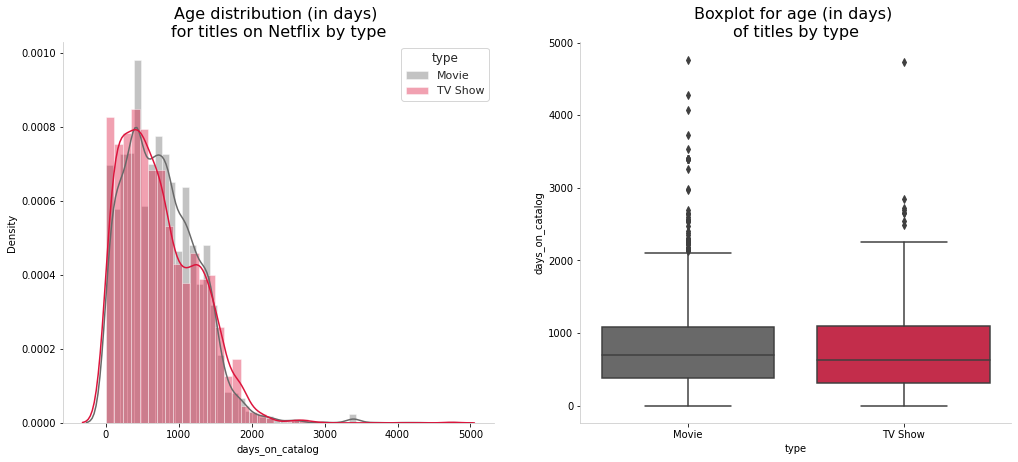

In [7]:
# Setting snapshot date
df_prep['catalog_date'] = df_prep['date_added_dt'].max()

# Computing deltas
df_prep['days_on_catalog'] = (df_prep['catalog_date'] - df_prep['date_added_dt']).dt.days
df_prep['months_on_catalog'] = (df_prep['days_on_catalog'] / 30)
df_prep['years_on_catalog'] = (df_prep['days_on_catalog'] / 365)

# Creating figure and plotting statistical analysis
colors = ['dimgrey', 'crimson']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
plot_distplot(df=df_prep, col='days_on_catalog', hue='type', ax=axs[0], color_list=colors,
              title='Age distribution (in days) \nfor titles on Netflix by type')
plot_distplot(df=df_prep, col='days_on_catalog', hue='type', ax=axs[1], palette=colors, kind='box',
              title='Boxplot for age (in days) \nof titles by type')

The age distribution of titles on the catalog are similar between movies and TV shows. One thing that can be pointed out is that movies are usually older than TV shows in terms of duration on catalog. We can see this by the boxtplot on the right where we have some outliers indicating really old movies (the median also reflects this behavior).

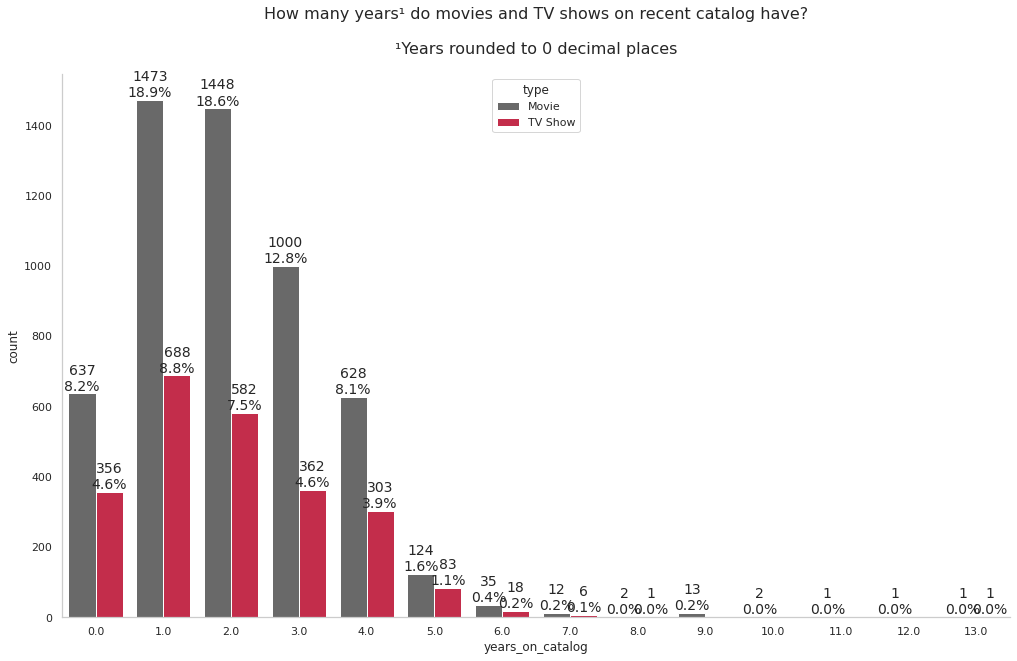

In [8]:
df_prep['years_on_catalog'] = round(df_prep['years_on_catalog'], 0)
plot_countplot(df=df_prep, col='years_on_catalog', hue='type', figsize=(17, 10), palette=colors,
               title='How many years¹ do movies and TV shows on recent catalog have?\n\n¹Years rounded to 0 decimal places')

After extracting an age information of the data, many things can be explored. The cells bellow brings us a vision of the top 5 oldest and newst movies and TV shows. Let's see if we are enjoying Netflix the right way!

___
* **_Top 5 movies with most days on catalog_**
___

In [9]:
# Top 5 oldest movies
cols = ['type', 'title', 'country', 'date_added', 'release_year', 'duration']
print(f'Top 5 movies with most days on catalog')
df_prep.query('type == "Movie"').sort_values(by='days_on_catalog', ascending=False).head().loc[:, cols]

Top 5 movies with most days on catalog


type                        title                country  \
7113  Movie         To and From New York          United States   
3248  Movie      Just Another Love Story                Denmark   
5765  Movie                     Splatter          United States   
3840  Movie  Mad Ron's Prevues from Hell          United States   
2041  Movie                Even the Rain  Spain, Mexico, France   

             date_added  release_year duration  
7113    January 1, 2008          2006   81 min  
3248        May 5, 2009          2007  104 min  
5765  November 18, 2009          2009   29 min  
3840   November 1, 2010          1987   84 min  
2041       May 17, 2011          2010  103 min

___
* **_Top 5 movies recently added on catalog_**
___

In [10]:
# Top 5 newest movies
print(f'Top 5 movies recently added on catalog')
df_prep.query('type == "Movie"').sort_values(by='days_on_catalog', ascending=True).head().loc[:, cols]

Top 5 movies recently added on catalog


type                          title  \
205   Movie                A Monster Calls   
5059  Movie                   Radium Girls   
1673  Movie                    Death of Me   
7644  Movie                       Wish You   
7220  Movie  Tribhanga - Tedhi Medhi Crazy   

                                   country        date_added  release_year  \
205   United Kingdom, Spain, United States  January 16, 2021          2016   
5059                         United States  January 16, 2021          2018   
1673               United States, Thailand  January 16, 2021          2020   
7644                                   NaN  January 15, 2021          2021   
7220                                   NaN  January 15, 2021          2021   

     duration  
205   108 min  
5059  103 min  
1673   94 min  
7644  102 min  
7220   96 min

___
* **_Top 5 TV shows with most days on catalog_**
___

In [11]:
# Top 5 oldest movies
print(f'Top 5 TV Shows with most days on catalog')
df_prep.query('type == "TV Show"').sort_values(by='days_on_catalog', ascending=False).head().loc[:, cols]

Top 5 TV Shows with most days on catalog


type            title                        country  \
1765  TV Show  Dinner for Five                  United States   
3098  TV Show      Jack Taylor         United States, Ireland   
1089  TV Show     Breaking Bad                  United States   
6056  TV Show         The 4400  United States, United Kingdom   
2503  TV Show      Gossip Girl                  United States   

             date_added  release_year   duration  
1765   February 4, 2008          2007   1 Season  
3098     March 31, 2013          2016   1 Season  
1089     August 2, 2013          2013  5 Seasons  
6056  September 1, 2013          2007  4 Seasons  
2503    October 8, 2013          2012  6 Seasons

___
* **_Top 5 TV shows recently added on catalog_**
___

In [12]:
# Top 5 newest movies
print(f'Top 5 TV shows recently added on catalog')
df_prep.query('type == "TV Show"').sort_values(by='days_on_catalog', ascending=True).head().loc[:, cols]

Top 5 TV shows recently added on catalog


type            title                country        date_added  \
6634  TV Show    The Magicians  United States, Canada  January 15, 2021   
2699  TV Show     Henry Danger          United States  January 15, 2021   
980   TV Show     Bling Empire                    NaN  January 15, 2021   
1780  TV Show   Disenchantment          United States  January 15, 2021   
1222  TV Show  Carmen Sandiego          United States  January 15, 2021   

      release_year   duration  
6634          2020  5 Seasons  
2699          2016  3 Seasons  
980           2021   1 Season  
1780          2021  3 Seasons  
1222          2021  4 Seasons

<a id="3.3"></a>
<font color="dimgrey" size=+2.0><b>3.3 How Many People Compose the Cast and Who are Them?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

By looking at the top titles on the tables above, it raised a idea on also looking at the people who were part of the movies or TV shows. With this we are talking about directors and cast. Let's use the `cast` column for creating a list of cast for each line and counting how many people participated on the movie or TV show creation.

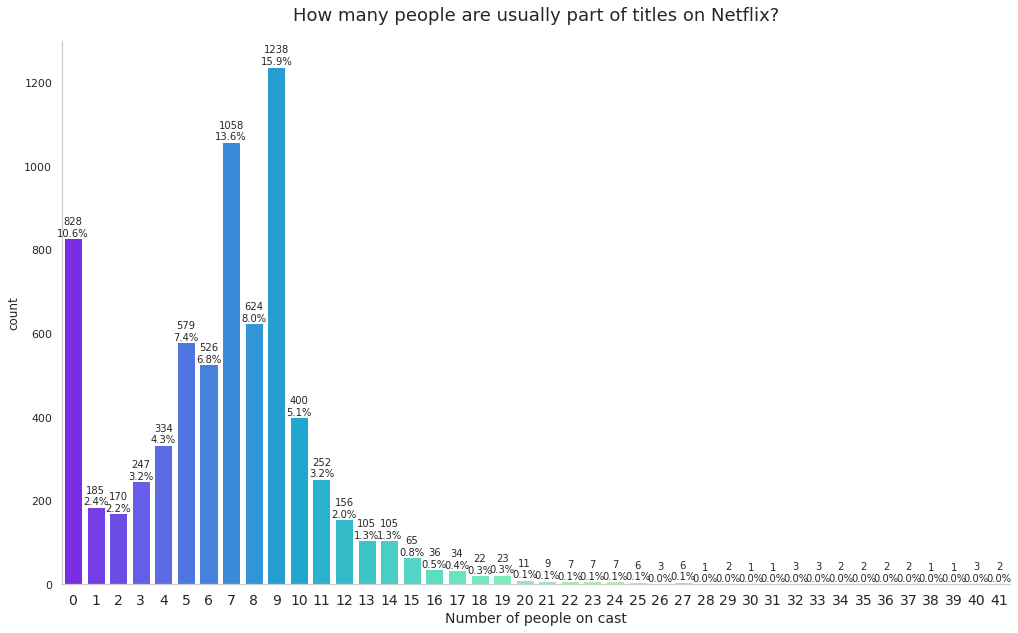

In [13]:
# Creating a function for extracting people on cast
def num_people_on_cast(cast_str, splitter=','):
    try:
        return int(len(cast_str.split(splitter)))
    except AttributeError as ae:
        return np.nan

# Extracting total people on cast
df_prep['num_people_on_cast'] = df_prep['cast'].apply(lambda x: num_people_on_cast(x))

# Plotting figure
fig, ax = plt.subplots(figsize=(17, 10))
plot_countplot(df=df_prep, col='num_people_on_cast', ax=ax, size_labels=10,
               title='How many people are usually part of titles on Netflix?', size_title=18)

# Customizing chart
ax.set_xticklabels(ax.get_xticks(), rotation=0)
ax.set_xlabel('Number of people on cast', size=14)
plt.xticks(fontsize=(14))
plt.show()

The countplot above shows a distribution of people on cast for titles on Netflix catalog. We can see that there are 1,238 titles with 9 people on cast and this is the marjority configuration. A low quantity of titles have more than 15 people on cast.

But how about actors and actresses? Who are them? Let's make a little change on our dataset and extract who appears most on Netflix catalog.

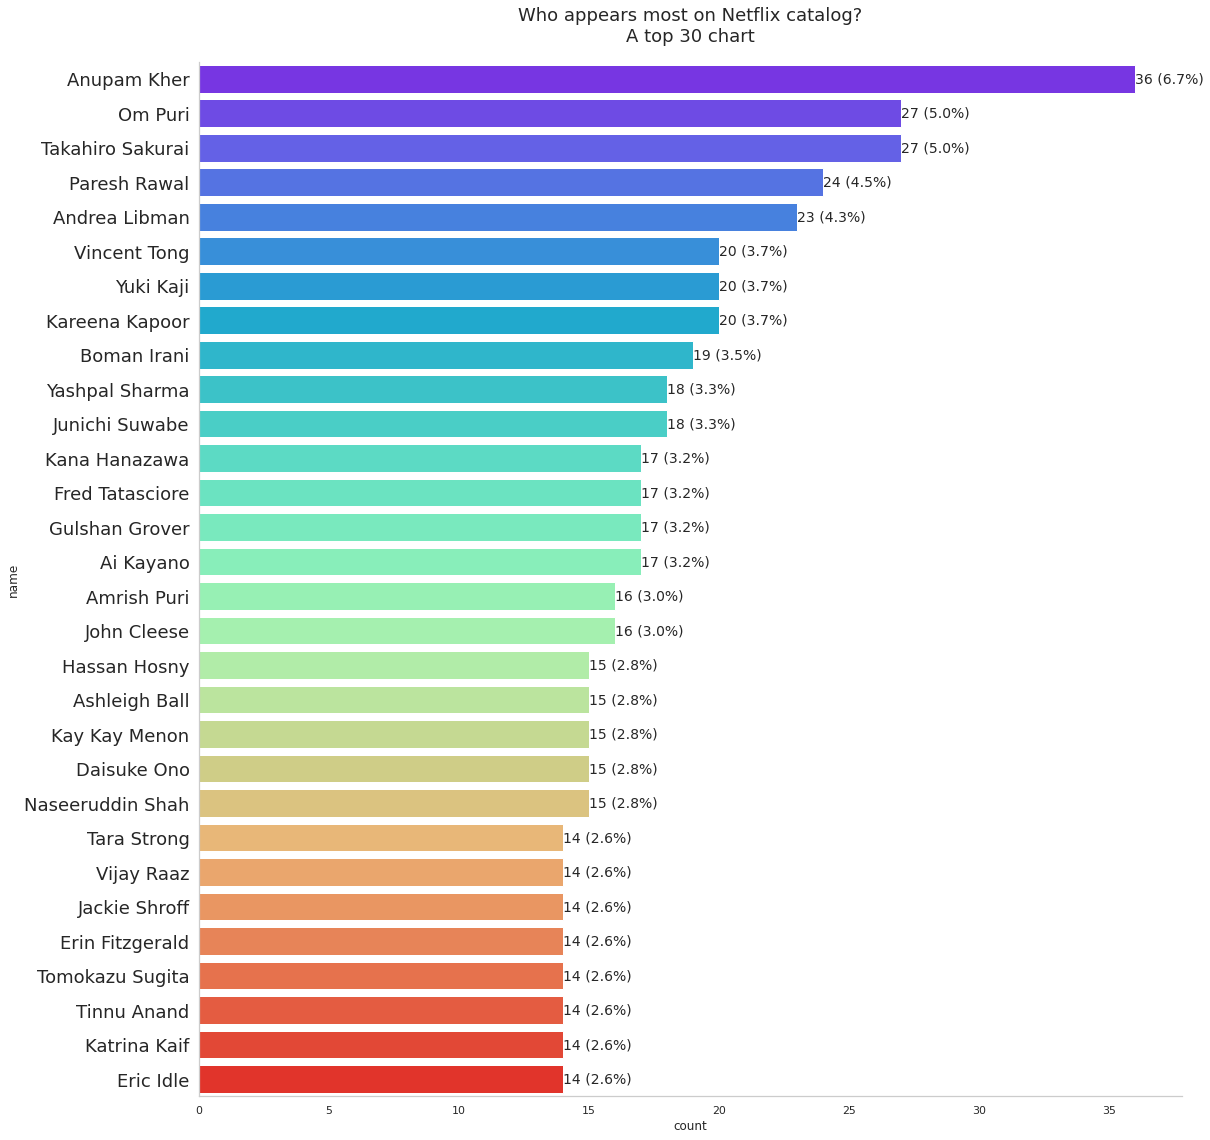

In [14]:
# Defining function for extracting individual names from cast list
def extract_list_from_string(cast_str, splitter=','):
    try:
        return [c.strip() for c in cast_str.split(splitter)]
    except AttributeError as ae:
        return np.nan

# Extracting actors and actresses
cast_list = extract_list_from_string(''.join(list(df_prep['cast'].fillna(' ').values)))
df_cast = pd.DataFrame(cast_list, columns=['name'])

# Counting appearence
plot_countplot(df=df_cast, col='name', top=30, order=True, orient='h', figsize=(17, 16),
               title='Who appears most on Netflix catalog?\nA top 30 chart', size_title=18)

# Customizing chart
plt.yticks(fontsize=(18))
plt.tight_layout()
plt.show()

Well, it seems that [Anupam Kher](https://www.google.com/search?channel=fs&client=ubuntu&q=anupam+kher) is the actor who appears most considering the names on cast for all titles on Netflix catalog. Other common names includes [Takahiro Sakurai](https://www.google.com/search?q=takahiro+sakurai&client=ubuntu&channel=fs&sxsrf=ALeKk02W_E6eaQ-4u8mhkSsoKZ477L3LWA%3A1621031057565&ei=kfieYILyIYbK_Qa38LeIDw&oq=takahiro+sakurai&gs_lcp=Cgdnd3Mtd2l6EAMyCAguEMsBEJMCMgIIADICCAAyAggAMgIIADIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgYIIxAnEBM6BAgjECc6CAgAELEDEIMBOgQILhBDOgQIABBDOgUIABCxAzoFCC4QsQM6AgguOgcILhCxAxBDOgsIABCxAxDHARCjAjoHCAAQsQMQQzoKCC4QsQMQQxCTAjoLCAAQsQMQxwEQrwE6DggAELEDEIMBEMcBEKMCOggIABDHARCvAToICC4QsQMQkwI6BQguEMsBOgoILhCxAxANEJMCOgQILhANOgQIABANOgoIABDHARCvARANOgYIABANEAo6BggAEA0QHjoFCC4QkwJKBQg4EgExUJ-pA1jjwQNgzsIDaAZwAHgAgAGPAogBoSGSAQcwLjEwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwjC_uuim8rwAhUGZd8KHTf4DfEQ4dUDCA0&uact=5), [Om Puri](https://www.google.com/search?q=om+puril&client=ubuntu&channel=fs&sxsrf=ALeKk02tU6yaTTUh61J9MO8idU-5KAEO-g%3A1621031117221&ei=zfieYNDwDM2m_QaG-oeACw&oq=om+puril&gs_lcp=Cgdnd3Mtd2l6EAMyBQguEJMCMgIIADICCAAyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgQIIxAnOgQILhBDOgQIABBDOggIABCxAxCDAToFCAAQsQM6CAguELEDEIMBOg4IABCxAxCDARDHARCvAToFCC4QsQM6AgguOggIABDHARCvAToECAAQCkoFCDgSATFQg1NY_1hg9VloAXAAeACAAf8BiAH2DJIBBTAuNC40mAEAoAEBqgEHZ3dzLXdpesgBB8ABAQ&sclient=gws-wiz&ved=0ahUKEwiQi6W_m8rwAhVNU98KHQb9AbAQ4dUDCA0&uact=5), [Paresh Rawal](https://www.google.com/search?q=paresh+rawal&client=ubuntu&channel=fs&sxsrf=ALeKk03hYI6kzOgZbADhHQzKw4qs44Q6Wg%3A1621031130346&ei=2vieYLymFOzB_Qa516eQBw&oq=paresh+rawal&gs_lcp=Cgdnd3Mtd2l6EAMyBQguEJMCMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgoILhCwAxANEJMCOgcIABCwAxANOgkIABCwAxANEB46BggjECcQEzoECCMQJzoECAAQQzoICC4QsQMQgwE6CAgAELEDEIMBOgUILhCxAzoCCAA6BQgAELEDOgIILjoKCAAQxwEQrwEQQzoICAAQxwEQrwE6BwguEEMQkwI6CggAEMcBEK8BEAo6BAgAEAo6BQguEMsBUJc_WOtKYNBLaAFwAHgAgAGTAogBkRKSAQUwLjIuOZgBAKABAaoBB2d3cy13aXrIAQrAAQE&sclient=gws-wiz&ved=0ahUKEwi8-8XFm8rwAhXsYN8KHbnrCXIQ4dUDCA0&uact=5), [Andrea Libman](https://www.google.com/search?q=andrea+libman&client=ubuntu&channel=fs&sxsrf=ALeKk00b0gfagSmkefMKaTXJKaNkFzZcWg%3A1621031142040&ei=5vieYM_EAe6mggfZhqfoDw&oq=andrea+libman&gs_lcp=Cgdnd3Mtd2l6EAMyBQguEJMCMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOgkIABCwAxAHEB46CAgAELADEMsBOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgQIIxAnOgQILhBDOgUIABCxAzoFCC4QsQM6CAguELEDEIMBOgIIADoICC4QsQMQkwI6CAgAELEDEIMBOgIILjoHCC4QsQMQCjoICAAQxwEQrwE6CwguELEDEIMBEJMCOgQILhAKOgcILhAKEMsBSgUIOBIBMVDRXliTaGCWaWgBcAB4AIABjAKIAZgUkgEGMC4xLjExmAEAoAEBqgEHZ3dzLXdpesgBD8ABAQ&sclient=gws-wiz&ved=0ahUKEwjPz4_Lm8rwAhVuk-AKHVnDCf0Q4dUDCA0&uact=5), [Kareena Kappor](https://www.google.com/search?q=kareena+kapoor&client=ubuntu&hs=s73&channel=fs&sxsrf=ALeKk02svmj1JyDSY8f2YcxpKAz28KYK3Q%3A1621029439287&ei=P_KeYIPkEPK6ggeRj4uAAg&gs_ssp=eJzj4tTP1TcwMjc1yzJg9OLLTixKTc1LVMhOLMjPLwIAZtUIWQ&oq=kareena+kap&gs_lcp=Cgdnd3Mtd2l6EAMYADIICC4QywEQkwIyBQgAEMsBMgUIABDLATICCAAyAggAMgIIADICCAAyBQgAEMsBMgUIABDLATIFCAAQywE6CQgAELADEAcQHjoHCAAQsAMQQzoFCAAQsAM6DQguELADEMgDEEMQkwI6CgguELADEMgDEEM6BwguEEMQkwI6BAguEEM6BAgjECc6BQguELEDOgIILjoICC4QsQMQgwE6BQgAELEDOggIABCxAxCDAToICC4QsQMQkwI6BAguEAo6CAgAEMcBEK8BOgcILhANEJMCOgQIABANSgUIOBIBMVD7wWJYhc5iYL_UYmgCcAB4AIABpgKIAeEWkgEGMC4xLjEymAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz) and others.

Looking at the names on the chart includes actors, actresses, voice actors and voice actresses and everyone who ever made part of the movie or show. By talking on that, it would be nice to see the cast appearence for each type of tile (movies and TV shows). So the chart above will apply this analysis by counting people appearence only on movies (left - gray) and only on TV shows (right - red)

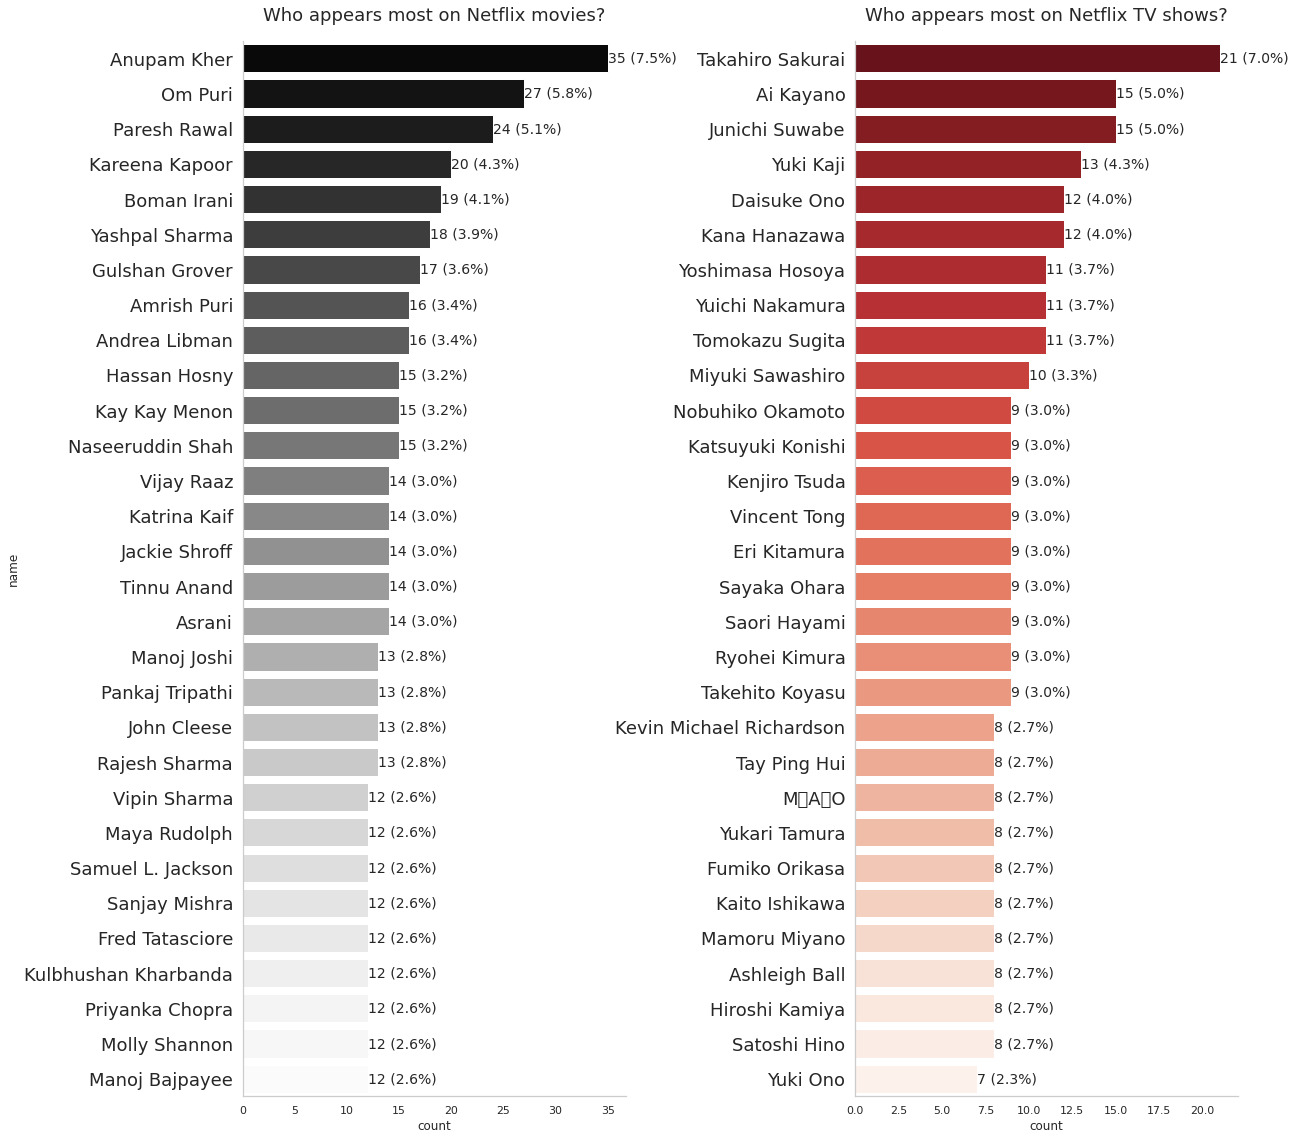

In [15]:
# Creating subsets for movies and TV shows
df_movies = df_prep.query('type == "Movie"')
df_tvs = df_prep.query('type == "TV Show"')

# Extracting actors and actresses
movies_cast_list = extract_list_from_string(''.join(list(df_movies['cast'].fillna(' ').values)))
df_cast_movies = pd.DataFrame(movies_cast_list, columns=['name'])
tvs_cast_list = extract_list_from_string(''.join(list(df_tvs['cast'].fillna(' ').values)))
df_cast_tvs = pd.DataFrame(tvs_cast_list, columns=['name'])

# Counting appearence
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 16))

# Plotting appearence on movies and TV Shows
plot_countplot(df=df_cast_movies, col='name', top=30, order=True, orient='h', ax=axs[0],
               title='Who appears most on Netflix movies?', size_title=18, palette='Greys_r')
plot_countplot(df=df_cast_tvs, col='name', top=30, order=True, orient='h', ax=axs[1],
               title='Who appears most on Netflix TV shows?', size_title=18, palette='Reds_r')

# Tighting layout
plt.tight_layout()
plt.setp(axs[0].get_yticklabels(), fontsize=18)
plt.setp(axs[1].get_yticklabels(), fontsize=18)
axs[1].set_ylabel('')
plt.show()

Now it seems we have a different scenario. By looking at the numbers, it's possible to see that [Anupam Kher](https://www.google.com/search?channel=fs&client=ubuntu&q=anupam+kher) made 36 appearence on total and 25 of them were on movies. He's not like to beeing found on TV shows. Meanwhile, [Takahiro Sakurai](https://www.google.com/search?q=takahiro+sakurai&client=ubuntu&channel=fs&sxsrf=ALeKk02W_E6eaQ-4u8mhkSsoKZ477L3LWA%3A1621031057565&ei=kfieYILyIYbK_Qa38LeIDw&oq=takahiro+sakurai&gs_lcp=Cgdnd3Mtd2l6EAMyCAguEMsBEJMCMgIIADICCAAyAggAMgIIADIFCAAQywEyBQgAEMsBMgUIABDLATIFCAAQywEyBQgAEMsBOgcIABCwAxBDOg0ILhCwAxDIAxBDEJMCOgoILhCwAxDIAxBDOgYIIxAnEBM6BAgjECc6CAgAELEDEIMBOgQILhBDOgQIABBDOgUIABCxAzoFCC4QsQM6AgguOgcILhCxAxBDOgsIABCxAxDHARCjAjoHCAAQsQMQQzoKCC4QsQMQQxCTAjoLCAAQsQMQxwEQrwE6DggAELEDEIMBEMcBEKMCOggIABDHARCvAToICC4QsQMQkwI6BQguEMsBOgoILhCxAxANEJMCOgQILhANOgQIABANOgoIABDHARCvARANOgYIABANEAo6BggAEA0QHjoFCC4QkwJKBQg4EgExUJ-pA1jjwQNgzsIDaAZwAHgAgAGPAogBoSGSAQcwLjEwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=gws-wiz&ved=0ahUKEwjC_uuim8rwAhUGZd8KHTf4DfEQ4dUDCA0&uact=5) appeared 27 times overall but 21 of them were on TV shows.

How about directors? Let's see the top 10 directors with more appearence on Netflix catalog.

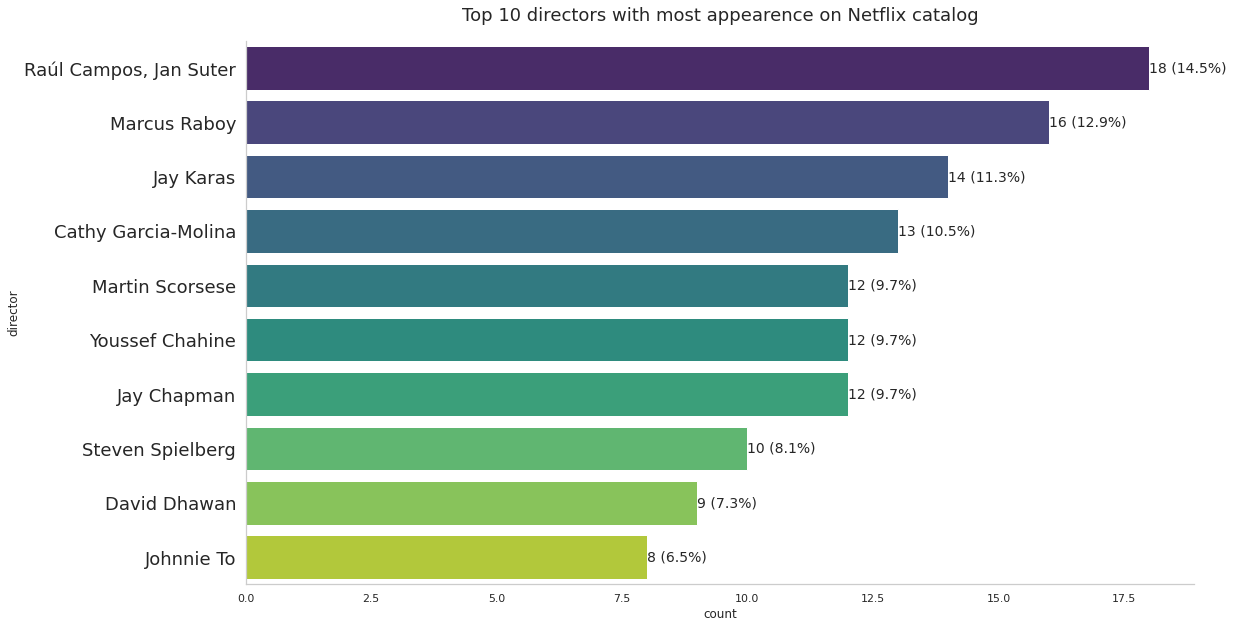

In [16]:
# Top 10 directors
plot_countplot(df=df, col='director', top=10, orient='h', order=True, figsize=(17, 10), palette='viridis',
               title='Top 10 directors with most appearence on Netflix catalog', size_title=18)
plt.yticks(fontsize=(18))
plt.show()

We can see some really known names on the top 10 list. If you don't recognize any of them, you should use more Netflix service :D

<a id="3.4"></a>
<font color="dimgrey" size=+2.0><b>3.4 From Where Netlix's Products Come From?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

On this topic, let's explore the column `country` which says where the title comes from. On this scenario, it will be possible to visualize Netflix catalog from a global perspective. In a first step, let's extract the correct information of country by looking at each individual country on the column, even if it's given by a string splitted by comma.

In [17]:
#  Function for extracting useful country info by its name
def get_country_info(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown'
    try:
        cn_a3_code =  country_name_to_country_alpha3(col)
    except:
        cn_a3_code = 'Unknown'
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_a3_code, cn_continent)

# Defining geolocator and function for extracting coordinates
geolocator = Nominatim(user_agent='thipanini94@gmail.com')
def get_geocode(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    
# Creating a dictionary of countries and geolocation (in case of API error)
country_dict = {'US': (39.7837304, -100.4458825),
                 'IN': (22.3511148, 78.6677428),
                 'GB': (54.7023545, -3.2765753),
                 'Unknown': (51.1461391, 12.233285),
                 'CA': (61.0666922, -107.991707),
                 'FR': (46.603354, 1.8883335),
                 'JP': (36.5748441, 139.2394179),
                 'ES': (39.3260685, -4.8379791),
                 'KR': (36.638392, 127.6961188),
                 'DE': (51.0834196, 10.4234469),
                 'MX': (22.5000485, -100.0000375),
                 'CN': (35.000074, 104.999927),
                 'AU': (-24.7761086, 134.755),
                 'EG': (26.2540493, 29.2675469),
                 'TR': (38.9597594, 34.9249653),
                 'HK': (22.2793278, 114.1628131),
                 'IT': (42.6384261, 12.674297),
                 'BR': (-10.3333333, -53.2),
                 'TW': (23.9739374, 120.9820179),
                 'BE': (50.6402809, 4.6667145),
                 'AR': (-34.9964963, -64.9672817),
                 'ID': (-2.4833826, 117.8902853),
                 'PH': (12.7503486, 122.7312101),
                 'NG': (9.6000359, 7.9999721),
                 'TH': (14.8971921, 100.83273),
                 'ZA': (-28.8166236, 24.991639),
                 'CO': (2.8894434, -73.783892),
                 'NL': (52.5001698, 5.7480821),
                 'DK': (55.670249, 10.3333283),
                 'IE': (52.865196, -7.9794599),
                 'SE': (59.6749712, 14.5208584),
                 'SG': (1.357107, 103.8194992),
                 'PL': (52.215933, 19.134422),
                 'AE': (24.0002488, 53.9994829),
                 'NO': (60.5000209, 9.0999715),
                 'NZ': (-41.5000831, 172.8344077),
                 'RU': (64.6863136, 97.7453061),
                 'IL': (31.5313113, 34.8667654),
                 'CL': (-31.7613365, -71.3187697),
                 'LB': (33.8750629, 35.843409),
                 'MY': (4.5693754, 102.2656823),
                 'PK': (30.3308401, 71.247499),
                 'CZ': (49.8167003, 15.4749544),
                 'CH': (46.813331250000005, 8.444947437939408),
                 'UY': (-32.8755548, -56.0201525),
                 'RO': (45.9852129, 24.6859225),
                 'FI': (63.2467777, 25.9209164),
                 'AT': (47.2, 13.2),
                 'LU': (49.8158683, 6.1296751),
                 'PE': (-6.8699697, -75.0458515),
                 'SA': (25.6242618, 42.3528328),
                 'GR': (38.9953683, 21.9877132),
                 'HU': (47.1817585, 19.5060937),
                 'IS': (64.9841821, -18.1059013),
                 'BG': (42.6073975, 25.4856617),
                 'JO': (31.1667049, 36.941628),
                 'RS': (44.1534121, 20.55144),
                 'KW': (29.2733964, 47.4979476),
                 'QA': (25.3336984, 51.2295295),
                 'MA': (31.1728205, -7.3362482),
                 'KH': (13.5066394, 104.869423),
                 'KE': (1.4419683, 38.4313975),
                 'VN': (13.2904027, 108.4265113),
                 'PT': (40.0332629, -7.8896263),
                 'GH': (7.8573710000000005, -1.0840975468820433),
                 'HR': (45.5643442, 17.0118954),
                 'IR': (32.6475314, 54.5643516),
                 'BD': (24.4768783, 90.2932426),
                 'ZW': (-19.01688, 29.35365015971339),
                 'SN': (14.46517725, -14.765340959100413),
                 'MT': (35.8885993, 14.4476911),
                 'SI': (45.8133113, 14.4808369),
                 'VE': (8.0018709, -66.1109318),
                 'UA': (49.4871968, 31.2718321),
                 'KY': (19.703182249999998, -79.9174627243246),
                 'GT': (15.6356088, -89.8988087),
                 'NA': (-23.2335499, 17.3231107),
                 'GE': (32.3293809, -83.1137366),
                 'NP': (28.1083929, 84.0917139),
                 'IQ': (33.0955793, 44.1749775),
                 'DZ': (28.0000272, 2.9999825),
                 'BM': (32.3018217, -64.7603583),
                 'AF': (33.7680065, 66.2385139),
                 'AL': (41.000028, 19.9999619),
                 'LK': (7.5554942, 80.7137847),
                 'SD': (14.5844444, 29.4917691),
                 'BW': (-23.1681782, 24.5928742),
                 'AO': (-11.8775768, 17.5691241),
                 'SY': (34.6401861, 39.0494106),
                 'BY': (53.4250605, 27.6971358),
                 'BS': (24.7736546, -78.0000547),
                 'AZ': (40.3936294, 47.7872508),
                 'SO': (8.3676771, 49.083416),
                 'AM': (40.7696272, 44.6736646),
                 'UG': (1.5333554, 32.2166578),
                 'JM': (18.1850507, -77.3947693),
                 'SK': (48.7411522, 19.4528646),
                 'NI': (12.6090157, -85.2936911),
                 'KZ': (47.2286086, 65.2093197),
                 'LV': (56.8406494, 24.7537645),
                 'LI': (47.1416307, 9.5531527),
                 'MW': (-13.2687204, 33.9301963),
                 'MU': (-20.2759451, 57.5703566),
                 'MN': (46.8250388, 103.8499736),
                 'ME': (42.9868853, 19.5180992),
                 'PA': (8.559559, -81.1308434),
                 'WS': (-13.7693895, -172.1200508),
                 'EC': (-1.3397668, -79.3666965),
                 'DO': (19.28131815, -70.035906834967),
                 'PY': (-23.3165935, -58.1693445),
                 'PR': (18.2214149, -66.41328179513847),
                 'CY': (34.9823018, 33.1451285),
                 'CU': (23.0131338, -80.8328748),
                 'LT': (55.3500003, 23.7499997)}

Well, let's apply some code for using the country information on our source dataset grouping the number of titles that appear for each country. After that, we will apply some functions for extracting geolocation information from those countries, like codes in different systems (alpha2 and alpha3) and also coordinates (latitude and longitude).

In [18]:
# Extracting number of titles references for each country
country_list = extract_list_from_string(','.join(list(df['country'].fillna('Unknown').values)))
df_countries = pd.DataFrame(pd.DataFrame(country_list, columns=['country_name']).value_counts())
df_countries.reset_index(inplace=True)
df_countries.columns = ['country_name', 'num_titles']

# Joining with country codes from pycountry-convert
df_countries['codes'] = df_countries['country_name'].apply(lambda x: get_country_info(x))
df_countries['country_a2'] = df_countries['codes'].apply(lambda x: x[0])
df_countries['country_a3'] = df_countries['codes'].apply(lambda x: x[1])
df_countries['continent'] = df_countries['codes'].apply(lambda x: x[2])

# Extracting latitude and longitude coordinates from geopy
#df_countries['geolocate'] = df_countries['country_name'].apply(lambda x: geolocate(x))

# Extracting latitude and longitude coordinates from countries dictionary already saved
df_countries['geolocate'] = df_countries['country_a2'].map(country_dict)
df_countries['latitude'] = df_countries['geolocate'].apply(lambda x: x[0])
df_countries['longitude'] = df_countries['geolocate'].apply(lambda x: x[1])

# Extracting latitude and longitude coordinates from countries dictiona
df_countries.head(10)

country_name  num_titles                        codes country_a2  \
0   United States        3297                (US, USA, NA)         US   
1           India         990                (IN, IND, AS)         IN   
2  United Kingdom         723                (GB, GBR, EU)         GB   
3         Unknown         507  (Unknown, Unknown, Unknown)    Unknown   
4          Canada         412                (CA, CAN, NA)         CA   
5          France         349                (FR, FRA, EU)         FR   
6           Japan         287                (JP, JPN, AS)         JP   
7           Spain         215                (ES, ESP, EU)         ES   
8     South Korea         212                (KR, KOR, AS)         KR   
9         Germany         199                (DE, DEU, EU)         DE   

  country_a3 continent                   geolocate   latitude   longitude  
0        USA        NA  (39.7837304, -100.4458825)  39.783730 -100.445882  
1        IND        AS    (22.3511148, 78.6677428)  22.351115   78.667743  
2        GBR        EU    (54.7023545, -3.2765753)  54.702354   -3.276575  
3    Unknown   Unknown     (51.1461391, 12.233285)  51.146139   12.233285  
4        CAN        NA   (61.0666922, -107.991707)  61.066692 -107.991707  
5        FRA        EU      (46.603354, 1.8883335)  46.603354    1.888334  
6        JPN        AS   (36.5748441, 139.2394179)  36.574844  139.239418  
7        ESP        EU    (39.3260685, -4.8379791)  39.326068   -4.837979  
8        KOR        AS    (36.638392, 127.6961188)  36.638392  127.696119  
9        DEU        EU    (51.0834196, 10.4234469)  51.083420   10.423447

After extracting all informations needed for working with countries, let's plot a map using the `folium` library that can answear the question: _how titles in Netflix catalog are distributed around the world?_ With the dataset above we could see the numbers in a table format (the DataFrame was already sorted by `num_titles`), but with maps we can visually see this answear in a more beautiful format.

In [19]:
#from folium.plugins import FastMarkerCluster

# Extracting locations
locations = list(df_countries['geolocate'])
df_countries['norm_titles_radius'] = np.log1p(df_countries['num_titles'])

# Creating a map using folium
map1 = folium.Map(location=[35, -0], zoom_start=2.0, tiles='cartodbpositron')

# Plugin: FastMarkerCluster
#FastMarkerCluster(data=locations).add_to(map1)

# Iterating over each row
for i in range(len(df_countries)):
    loc = df_countries['geolocate'][i]
    country = df_countries['country_name'][i]
    titles = df_countries['num_titles'][i]
    tooltip = f'<b><i>Country:</b></i> {country}\n<b><i>Titles:</b></i> {titles}'
    
    radius = df_countries['norm_titles_radius'][i] * 2
    
    # Adding CircleMarker plugin
    folium.CircleMarker(location=loc, radius=radius, color='crimson', 
                        popup=tooltip, fill=True).add_to(map1)

map1

There is another good format to see how is Netflix around the world: by using Choropleth maps.

In [20]:
# Defining a style function for Choropleth
def style_function(feature):
    """
    Customize maps
    """
    return {
        'fillColor': '#ffaf00',
        'color': 'grey',
        'weight': 1.0,
        'dashArray': '5, 5'
    }

# Defining a highlight function for Choropleth
def highlight_function(feature):
    """
    Customize maps
    """
    return {
        'fillColor': '#ffaf00',
        'color': 'white',
        'weight': 1.5,
        'dashArray': '5, 5'
    }

In [21]:
# Extracting a world map model from github
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json'
json_data = gpd.read_file(f'{url}/world-countries.json')

# Joining data for custom tooltips
global_data = json_data.merge(df_countries, how='left', left_on='id', right_on='country_a3').fillna(0)
global_data = global_data.loc[:, ['name', 'num_titles', 'geometry']]

# Creating a map using folium
m = folium.Map(
    location=[35, 0], 
    zoom_start=1.50,
    tiles='openstreetmap'
)

# Choropleth map
folium.Choropleth(
    geo_data=world_geo,
    name='Netflix Around the World',
    data=df_countries.query('country_a3 != "Unknown"'),
    columns=['country_a3', 'norm_titles_radius'],
    key_on='feature.id',
    fill_color='Reds',
    fill_opacity=.9,
    line_opacity=.7,
    nan_fill_color='white',
    nan_fill_opacity=0.9,
    legend_name='Log of Number of Titles'
).add_to(m)

# Adding a fullscreen button plugin
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(m)

# Customizing tooltips
folium.GeoJson(
    global_data,
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=folium.GeoJsonTooltip(fields=['name', 'num_titles'],
                                  aliases=['Country:', 'Number of Titles:'],
                                  labels=True,
                                  sticky=True)
).add_to(m)
    
m

Well, using maps is a good way to visualize the spread of Netflix around the world in termos of titles added on the streaming platform. 

<a id="3.5"></a>
<font color="dimgrey" size=+2.0><b>3.5 Movies and TV Shows Duration (Minutes and Seasons)</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

By now, let's extract information on `duration` column for movies and TV shows for visualizing some patterns on Netflix catalog. The idea is to split the source data on this column in order to extract the numerical value and the scale. Looking at the data, it's possible to see that we have different scales for movies (minutes) and TV shows (seasons) and, because of this, we will plot two different charts for looking at titles duration for this two types.

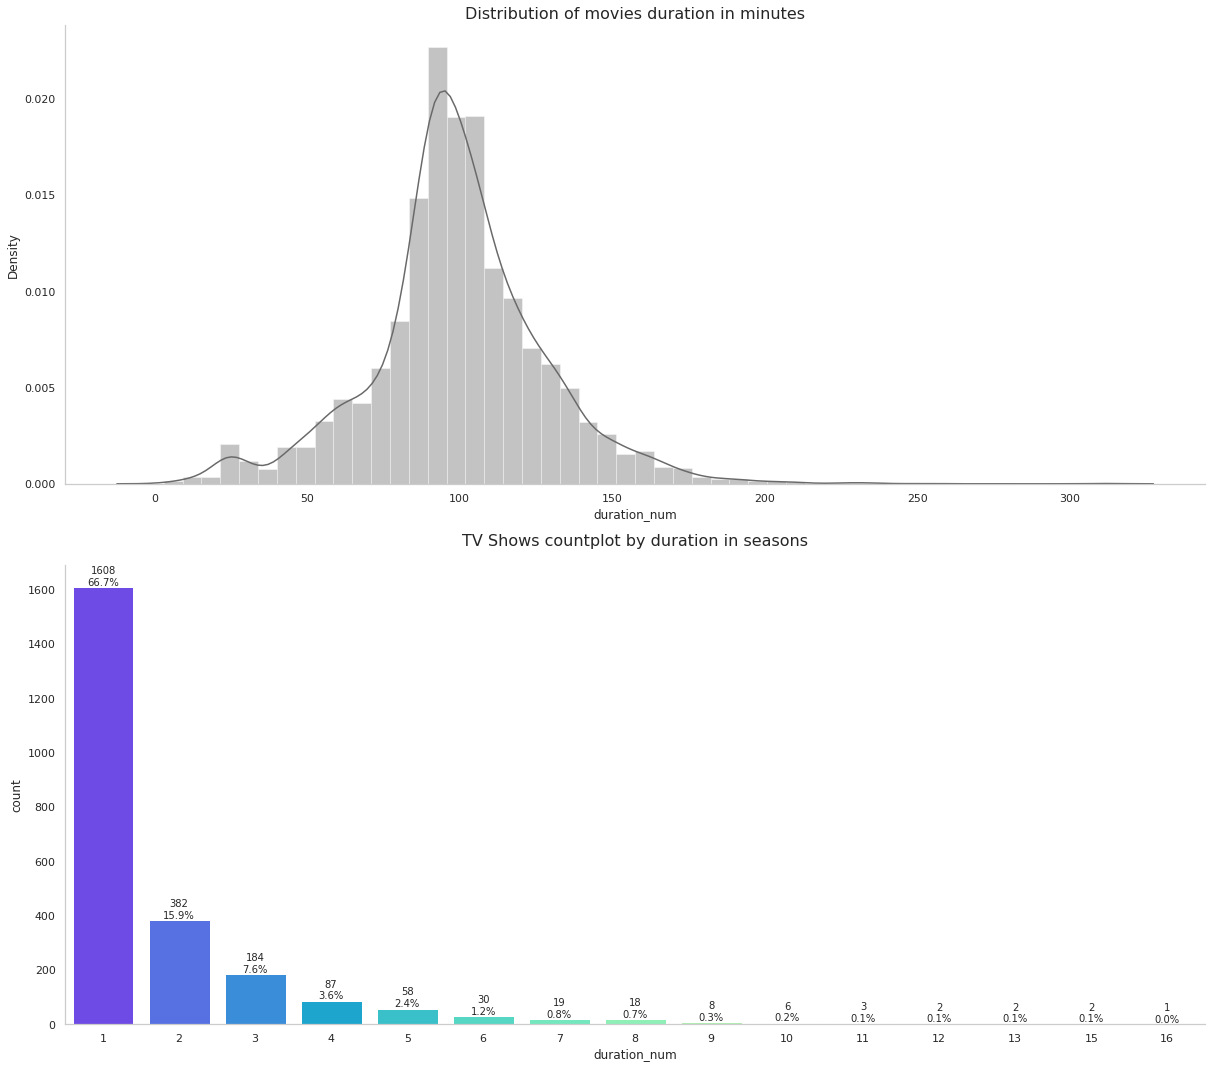

In [22]:
# Extracting the age of the title in years
df_prep['title_age_years'] = datetime.now().year - df_prep['release_year']

# Extracting title's duration information
df_prep['duration_num'] = df_prep['duration'].apply(lambda x: int(x.split(' ')[0]))
df_prep['duration_scale'] = df_prep['duration'].apply(lambda x: x.split(' ')[-1].strip())

# Fixing duration scale name
df_prep['duration_scale'] = df_prep['duration_scale'].apply(lambda x: 'Season' if x in ('Season', 'Seasons') else x)

# Filtering movies and tvshows
movies = df_prep.query('is_movie == 1')
tvshows = df_prep.query('is_tvshow == 1')

# Plotting duration on movies
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(17, 15))
plot_distplot(df=movies, col='duration_num', ax=axs[0], color='dimgrey',
              title='Distribution of movies duration in minutes')
plot_countplot(df=tvshows, col='duration_num', ax=axs[1], color='crimson', size_labels=10,
               title='TV Shows countplot by duration in seasons')

plt.tight_layout()
plt.show()

___
* **_Top 5 movies with highest duration_**
___

In [23]:
# Sorting movies
movies.sort_values(by='duration_num', ascending=False).head().loc[:, cols]

type                       title        country         date_added  \
957   Movie  Black Mirror: Bandersnatch  United States  December 28, 2018   
6850  Movie      The School of Mischief          Egypt       May 21, 2020   
4490  Movie              No Longer kids          Egypt       May 21, 2020   
3694  Movie          Lock Your Girls In            NaN       May 21, 2020   
5108  Movie             Raya and Sakina            NaN       May 21, 2020   

      release_year duration  
957           2018  312 min  
6850          1973  253 min  
4490          1979  237 min  
3694          1982  233 min  
5108          1984  230 min

___
* **_Top 5 TV shows with most seasons_**
___

In [24]:
# Sorting movies
tvshows.sort_values(by='duration_num', ascending=False).head().loc[:, cols]

type                   title                country       date_added  \
2538  TV Show          Grey's Anatomy          United States      May 9, 2020   
5912  TV Show            Supernatural  United States, Canada     June 5, 2020   
4438  TV Show                    NCIS          United States     July 1, 2018   
5137  TV Show            Red vs. Blue          United States              NaN   
1471  TV Show  COMEDIANS of the world          United States  January 1, 2019   

      release_year    duration  
2538          2019  16 Seasons  
5912          2019  15 Seasons  
4438          2017  15 Seasons  
5137          2015  13 Seasons  
1471          2019  13 Seasons

Maybe it was well known for almost everybody, but our preparation processing showed up Grey's Anatomy and Supernatural as the top two TV shows with most seasons on Netflix catalog. Let's use the country information to see the ones with longest movies and tv shows in average.

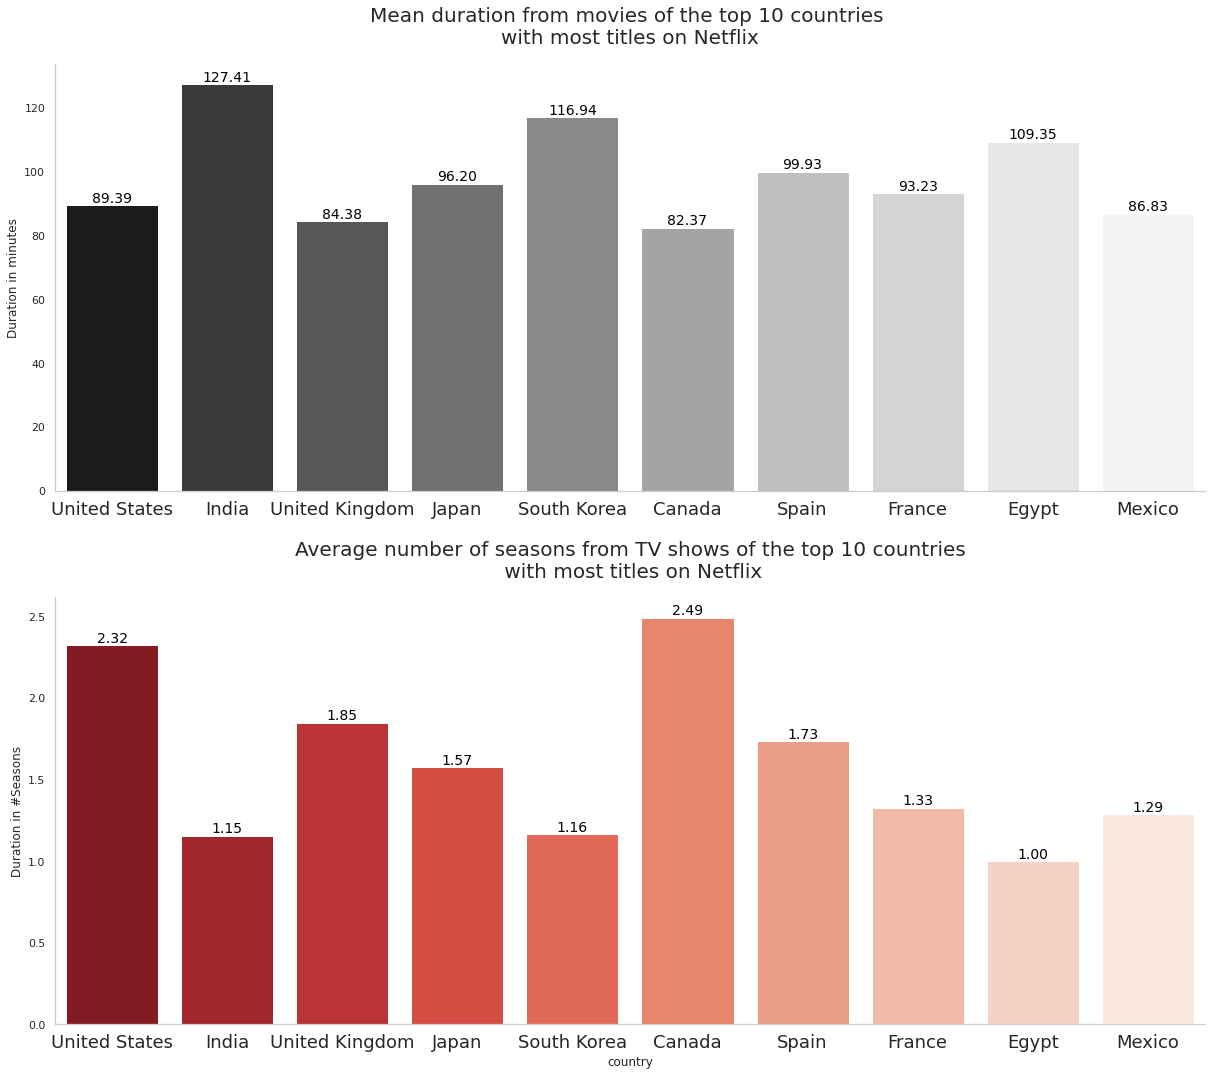

In [25]:
# Extracting top 10 countries with most titles on Netflix
top_countries = df_prep['country'].value_counts().index[:10]
df_countries = df_prep.query('country in (@top_countries)')

# Defining figure and axis
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(17, 15))

# Plotting average duration for movies of top 10 countries
plot_aggregation(df=df_countries.query('type == "Movie"'), group_col='country', palette='Greys_r',
                 value_col='duration_num', aggreg='mean', ax=axs[0], order=top_countries, size_title=20,
                 title='Mean duration from movies of the top 10 countries \nwith most titles on Netflix')

# Plotting average number os seasons for TV shows of top 10 countries
plot_aggregation(df=df_countries.query('type == "TV Show"'), group_col='country', palette='Reds_r',
                 value_col='duration_num', aggreg='mean', ax=axs[1], order=top_countries, size_title=20,
                 title='Average number of seasons from TV shows of the top 10 countries\n with most titles on Netflix')

# Tighting layout
plt.tight_layout()
plt.setp(axs[0].get_xticklabels(), fontsize=18)
plt.setp(axs[1].get_xticklabels(), fontsize=18)
axs[0].set_xlabel('')
axs[0].set_ylabel('Duration in minutes')
axs[1].set_ylabel('Duration in #Seasons')
plt.show()

It seems like India is the country the provides movies to Netflix with highest duration (at the same time, the average number of seasons of Indian TV shows are quite low). On the other hand, we can see that Canada usually provides TV shows to Netflix with a high number of seasons in average.

Let's go ahead with our exploration and take a look at new questions to be answeared with data.

<a id="3.6"></a>
<font color="dimgrey" size=+2.0><b>3.6 Dramas or Comedies? How Are Netflix Titles Listed In?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

On the road for gathering insights from Netflix titles dataset, let's take a deep dive on the `listed_in` column to extract some trends or patterns on how the catalog are distributed in termos of movies and TV shows types. There are more dramas than thrillers? How about comedy and cult movies?

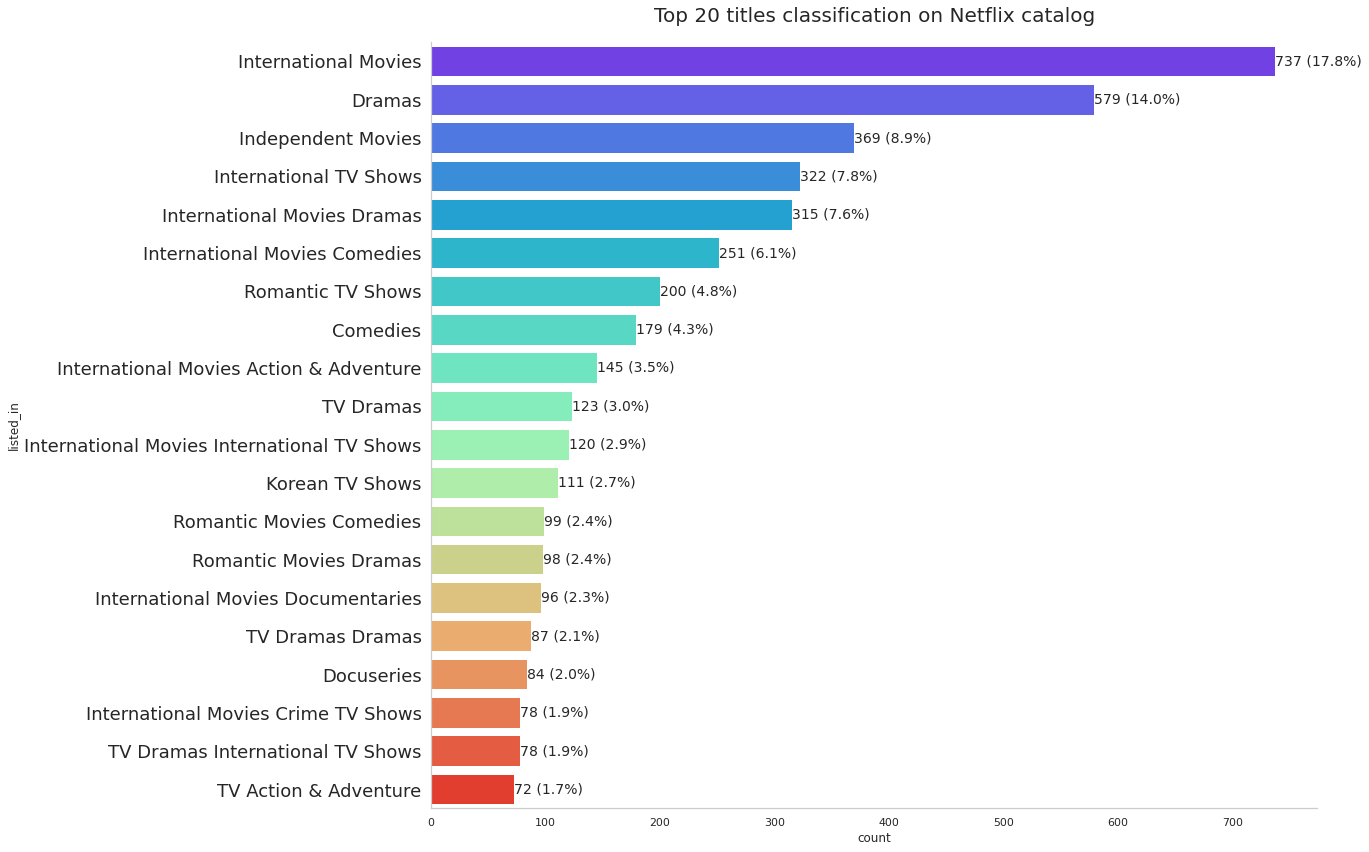

In [26]:
# Extracting a list for titles classification
listed_titles = pd.DataFrame(extract_list_from_string(' '.join(list(df_prep['listed_in'].values))))
listed_titles.columns = ['listed_in']

# Plotting a bar chart with top N types
plot_countplot(df=listed_titles, col='listed_in', orient='h', top=20, order=True, figsize=(17, 12),
               title='Top 20 titles classification on Netflix catalog', size_title=20)

plt.tight_layout()
plt.yticks(fontsize=(18))
plt.show()

Ok, we can see that *International Movies*, *Dramas* and *Independent Movies* are the top 3 flavours of titles on Netflix. But one thing must be said: when looking at the `listed_in` column, it was possible to look at some "typos" on string entries that compose the attribute. The thing is that not all `listed_in` strings are delimited by comma, for example. Some of them were delimitted by space and that's why we can see things like *International Movies Crime TV Shows* in one category and not at least three different ones (maybe the correct was International Movies, Crime and TV Shows as separated categories).

<a id="3.7"></a>
<font color="dimgrey" size=+2.0><b>3.7 Can Netflix Draw our Attention Just by Titles Description?</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In one of the most exciting analysis, we can go deeper at the `description` column of the dataset to extract some text trends on how Netflix uses this feature for drawing the public attention. For this, let's use some functions for extracting information from raw text presenting on our dataset.

In [27]:
!pip install wordcloud
!pip install nltk

In [28]:
# Importing libraries
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import requests

# Function for counting ngrams
def ngrams_count(corpus, ngram_range=(1, 1), n=-1, cached_stopwords=stopwords.words('english')):
    """
    Applies text transformation for counting words in a n_gram range
    
    Parameters
    ----------
    :param corpus: text list to be analysed [type: list or pd.Series]
    :param ngram_range: ngrams to be extracted from corpus [type: tuple, default=(1, 1)]
    :param n: limits the returning of only the top N ngrams [type: int, default=-1]
        *in case of n=-1, all ngrams will be returned
    :param cached_stopwords: stopwords to be used on filtering words 
        *[type: list, default=stopwords.words('english')]
        
    Return
    ------
    :return df_count: DataFrame with columns "ngram" and "count" [type: pd.DataFrame]
    
    Application
    -----------
    df_count = ngrams_count(corpus=df['text_attribute'])
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    
    # Summing words and generating a frequency list
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    return pd.DataFrame(total_list, columns=['ngram', 'count'])

# Building a pre configured wordcloud object
def generate_wordcloud(corpus, ngram_range=(1, 1), n=-1, cached_stopwords=stopwords.words('english'),
                       **kwargs):
    """
    Applies a ngram count and generates a wordcloud object using a counter dictionary
    
    Parameters
    ----------
    :param corpus: text list to be analysed [type: list or pd.Series]
    :param ngram_range: ngrams to be extracted from corpus [type: tuple, default=(1, 1)]
    :param n: limits the returning of only the top N ngrams [type: int, default=-1]
        *in case of n=-1, all ngrams will be returned
    :param cached_stopwords: stopwords to be used on filtering words 
        *[type: list, default=stopwords.words('english')]
    :param **kwargs: additional parameters
        :arg width: wordcloud width [type: int, default=1280]
        :arg height: wordcloud height [type: int, default=720]
        :arg random_state: random seed for word positioning [type: int, defualt=42]
        :arg colormap: colormap for wordcloud chart [type: string, default='viridis']
        :arg background_color: wordcloud background color [type: string, default='white']
        :arg mask: either an internet image url or an image array for using as mask
            *[type: string or array, default=None]
        
    Return
    ------
    :return wordcloud: WordCloud object [type: wordcloud.WordCloud]
    
    Application
    -----------
    wordcloud = generate_wordcloud(corpus=df['text_attribute'])
    """
    
    # Generating a DataFrame with ngrams count
    df_count = ngrams_count(corpus=corpus, ngram_range=ngram_range, n=n, 
                            cached_stopwords=cached_stopwords)
    
    # Transforming the ngram count into a dictionary
    words_dict = {w: c for w, c in df_count.loc[:, ['ngram', 'count']].values}
    
    # Extracting kwargs for generating a wordcloud
    width = kwargs['width'] if 'width' in kwargs else 1280
    height = kwargs['height'] if 'height' in kwargs else 720
    random_state = kwargs['random_state'] if 'random_state' in kwargs else 42
    colormap = kwargs['colormap'] if 'colormap' in kwargs else 'viridis'
    background_color = kwargs['background_color'] if 'background_color' in kwargs else 'white'
    
    # Creating a mask if applicable
    mask = kwargs['mask'] if 'mask' in kwargs else None
    try:
        if type(mask) == str and mask is not None:
            # Requesting the image url using requests and transforming it using PIL
            img = Image.open(requests.get(mask, stream=True).raw)
            mask_array = np.array(img)
            
            # If mask array is a 3-dimensional array, transformes it into a 2-dimensional
            if len(mask_array.shape) == 3:
                mask_array = mask_array[:, :, -1]
            
            # Creating a transformarion mask and changing pixels on it
            transf_mask = np.ndarray((mask_array.shape[0], mask_array.shape[1]), np.int32)
            for i in range(len(mask_array)):
                transf_mask[i] = [255 if px == 0 else 0 for px in mask_array[i]]

        # If mask argument is already given as an array
        else:
            transf_mask = mask
            
    except Exception as e:
        # Error on requesting or preparing the mask - wordcloud will be generated without it
        print(f'Error on requesting or preparing mask. WordCloud will be generated without mask')
        transf_mask = None
        
    
    # Generating wordcloud
    wordcloud = WordCloud(width=width, height=height, random_state=random_state, colormap=colormap, 
                          background_color=background_color, mask=transf_mask).generate_from_frequencies(words_dict)
    
    return wordcloud

# Plotting a custom wordcloud
def plot_wordcloud(corpus, ngram_range=(1, 1), n=-1, cached_stopwords=stopwords.words('english'),
                   **kwargs):
    """
    Generates a ngram count and a wordcloud object for plotting a custom wordcloud chart
    
    Parameters
    ----------
    :param corpus: text list to be analysed [type: list or pd.Series]
    :param ngram_range: ngrams to be extracted from corpus [type: tuple, default=(1, 1)]
    :param n: limits the returning of only the top N ngrams [type: int, default=-1]
        *in case of n=-1, all ngrams will be returned
    :param cached_stopwords: stopwords to be used on filtering words 
        *[type: list, default=stopwords.words('english')]
    :param **kwargs: additional parameters
        :arg width: wordcloud width [type: int, default=1280]
        :arg height: wordcloud height [type: int, default=720]
        :arg random_state: random seed for word positioning [type: int, defualt=42]
        :arg colormap: colormap for wordcloud chart [type: string, default='viridis']
        :arg background_color: wordcloud background color [type: string, default='white']
        :arg mask: either an internet image url or an image array for using as mask
            *[type: string or array, default=None]
        :arg figsize: figure dimension [type: tuple, default=(20, 17)]
        :arg ax: matplotlib axis in case of external figure defition [type: mpl.Axes, default=None]
        :arg title: chart title [type: string, default=f'Custom WordCloud Plot']
        :arg size_title: title size [type: int, default=18]
        :arg save: flag for saving the image created [type: bool, default=None]
        :arg output_path: path for image to be saved [type: string, default='output/']
        :arg img_name: filename for image to be saved 
            [type: string, default='wordcloud.png']
        
    Return
    ------
    This function returns nothing besides the plot of a custom wordcloud
    
    Application
    -----------
    plot_wordcloud(corpus=df['text_attribute'])
    """
    
    # Extracting kwargs for generating a wordcloud
    width = kwargs['width'] if 'width' in kwargs else 1280
    height = kwargs['height'] if 'height' in kwargs else 720
    random_state = kwargs['random_state'] if 'random_state' in kwargs else 42
    colormap = kwargs['colormap'] if 'colormap' in kwargs else 'viridis'
    background_color = kwargs['background_color'] if 'background_color' in kwargs else 'white'
    mask = kwargs['mask'] if 'mask' in kwargs else None
    
    # Generating a pre configured wordcloud
    wordcloud = generate_wordcloud(corpus=corpus, ngram_range=ngram_range, n=n, 
                                   cached_stopwords=cached_stopwords, width=width, height=height,
                                   random_state=random_state, colormap=colormap, 
                                   background_color=background_color, mask=mask)
    
    # Extracting kwargs for figure plotting
    figsize = kwargs['figsize'] if 'figsize' in kwargs else (20, 17)
    ax = kwargs['ax'] if 'ax' in kwargs else None
    title = kwargs['title'] if 'title' in kwargs else f'Custom WordCloud Plot'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 18
    
    # Creating figure and plotting wordcloud
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)  
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(title, size=size_title, pad=20)
    
    # Saving image if applicable
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'wordcloud.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

# Plotting a bar chart for a ngram count 
def plot_ngram_count(corpus, ngram_range=(1, 1), n=20, cached_stopwords=stopwords.words('english'),
                     **kwargs):
    """
    Plots a bar chart for a ngram count
    
    Parameters
    ----------
    :param corpus: text list to be analysed [type: list or pd.Series]
    :param ngram_range: ngrams to be extracted from corpus [type: tuple, default=(1, 1)]
    :param n: limits the returning of only the top N ngrams [type: int, default=20]
        *in case of n=-1, all ngrams will be returned - be careful!
    :param cached_stopwords: stopwords to be used on filtering words 
        *[type: list, default=stopwords.words('english')]
    :param **kwargs: additional parameters
        :arg x: x axis attribute on chart [type: string, default='count']
        :arg y: y axis attribute on chart [type: string, default='ngram']
        :arg figsize: figure dimension [type: tuple, default=(20, 17)]
        :arg ax: matplotlib axis in case of external figure defition [type: mpl.Axes, default=None]
        :arg title: chart title [type: string, default=f'Custom WordCloud Plot']
        :arg size_title: title size [type: int, default=18]
        :arg save: flag for saving the image created [type: bool, default=None]
        :arg output_path: path for image to be saved [type: string, default='output/']
        :arg img_name: filename for image to be saved 
            [type: string, default='wordcloud.png']
        
    Return
    ------
    This function returns nothing besides the plot of a custom wordcloud
    
    Application
    -----------
    plot_ngram_count(corpus=df['text_attribute'])
    """
    
    # Generating a DataFrame with ngrams count
    df_count = ngrams_count(corpus=corpus, ngram_range=ngram_range, n=n, 
                            cached_stopwords=cached_stopwords)
    
    # Extracting kwargs for figure plotting
    x = kwargs['x'] if 'x' in kwargs else 'count'
    y = kwargs['y'] if 'y' in kwargs else 'ngram'
    figsize = kwargs['figsize'] if 'figsize' in kwargs else (20, 17)
    ax = kwargs['ax'] if 'ax' in kwargs else None
    palette = kwargs['palette'] if 'palette' in kwargs else 'viridis'
    title = kwargs['title'] if 'title' in kwargs else f'$n{ngram_range[0]}gram$ Count on Corpus'
    size_title = kwargs['size_title'] if 'size_title' in kwargs else 18
    
    # Creating figure and plotting wordcloud
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)  
    sns.barplot(x=x, y=y, data=df_count, ax=ax, palette=palette)
    ax.set_title(title, size=size_title, pad=20)
    
    # Customizing axis
    format_spines(ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.setp(ax.get_yticklabels(), fontsize=16)
    
    # Tighting layout
    plt.tight_layout()
    
    # Saving image if applicable
    if 'save' in kwargs and bool(kwargs['save']):
        output_path = kwargs['output_path'] if 'output_path' in kwargs else 'output/'
        img_name = kwargs['img_name'] if 'img_name' in kwargs else f'wordcloud.png'
        save_fig(fig=fig, output_path=output_path, img_name=img_name)

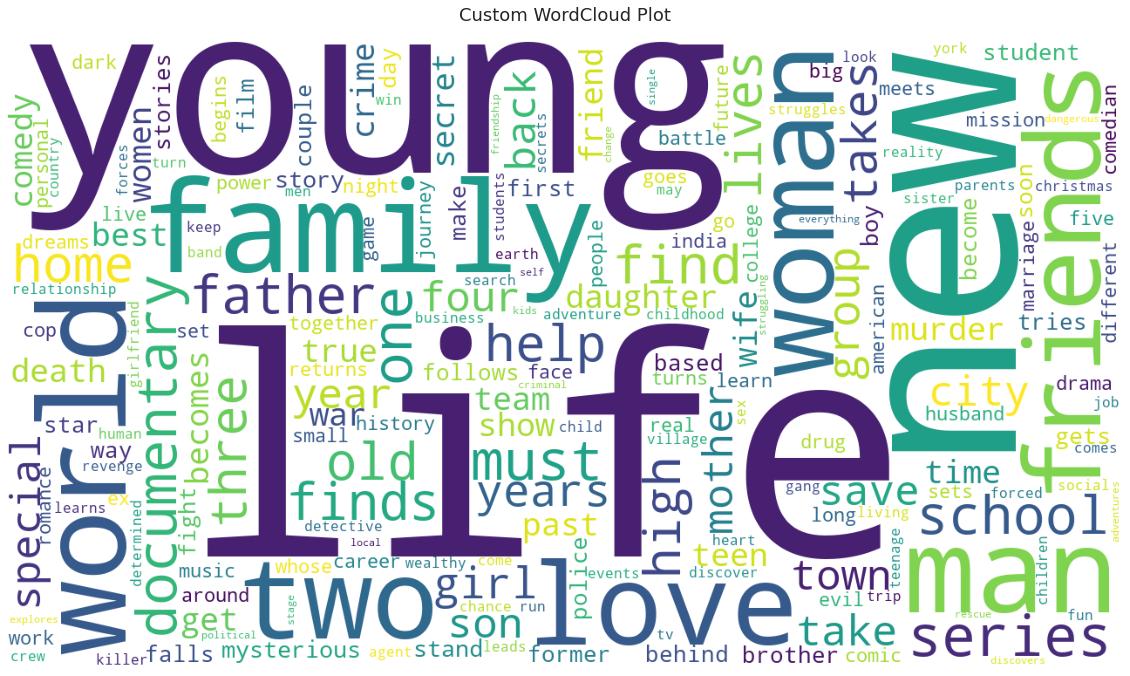

In [29]:
# Plotting a custom wordcloud
plot_wordcloud(df['description'])

Here we have a custom wordcloud chart for each world on `description` column. From user perspective, it can be said that these are all the words presented on Netflix titles description. Interesting how some words really pop up on eyes, like *life*, *young*, *new* and *love*.

On the continuous road to improvement, the `plot_wordcloud()` function can be used for plotting a custom wordcloud using a background mask. For this we can pass an image array (in case of reading a local image using PIL, for example) or even passing an internet image url string - the function handles the request by itself. Let's try to use the Netflix logo for customizing even more our WordCloud.

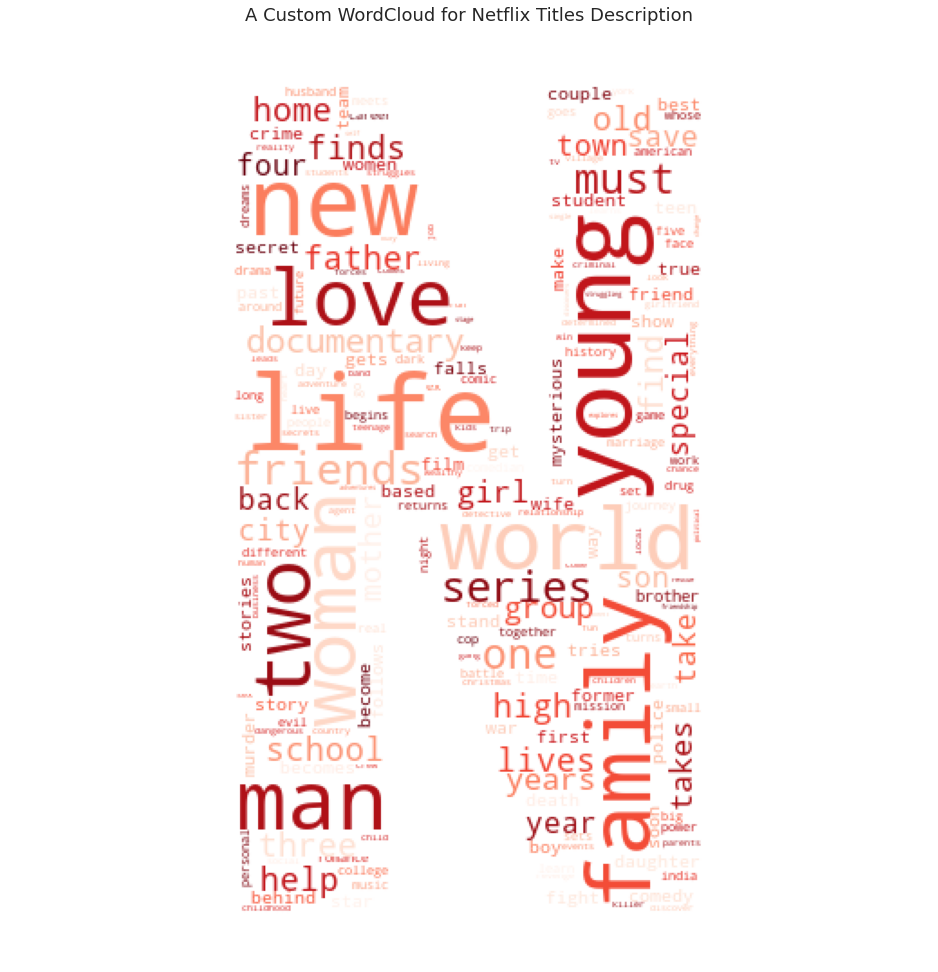

In [30]:
# Plotting a wordcloud with background image
url_mask = 'https://cdn4.iconfinder.com/data/icons/logos-and-brands-1/512/227_Netflix_logo-512.png'
plot_wordcloud(df['description'], mask=url_mask, colormap='Reds_r',
               title='A Custom WordCloud for Netflix Titles Description')

Awesome! Now still on text description analysis, let's use another excellent function for measuring a count for each word on the text corpus using *ngrams*. For this purpose, we will analyse two graphs: an unigram extraction and a bigram extraction.

With this we will see trends like how the words on titles descriptions are given alone (unigram) or in pairs (bigrams).

*Obs: I also tried to use trigrams, but it wasn't very effective, as long as there are no trends os patterns on titles descriptions with three words together*

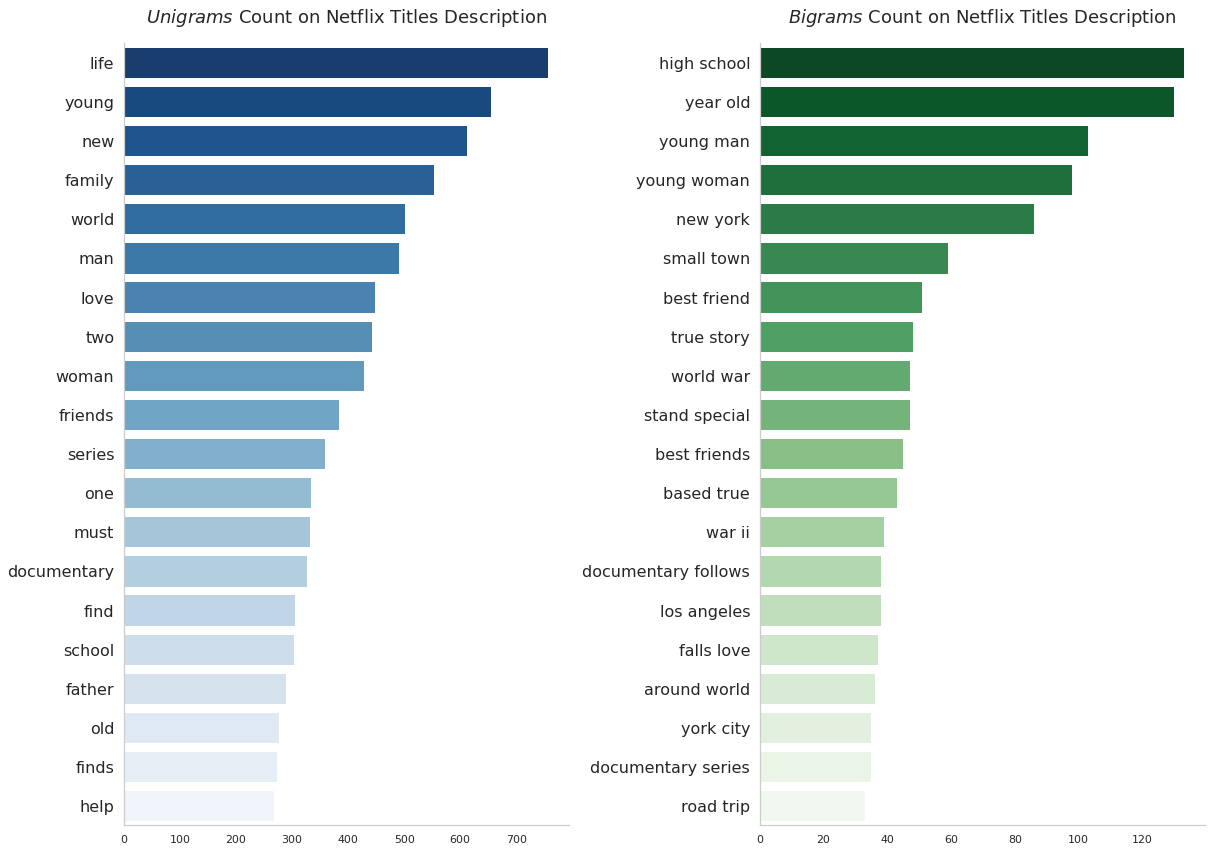

In [31]:
# Plotting ngrams charts
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 12))
plot_ngram_count(df['description'], ngram_range=(1, 1), ax=axs[0], palette='Blues_r',
                 title='$Unigrams$ Count on Netflix Titles Description')
plot_ngram_count(df['description'], ngram_range=(2, 2), ax=axs[1], palette='Greens_r',
                 title='$Bigrams$ Count on Netflix Titles Description')

Well done! By looking at the wordclouds above, we have already seen word trends like *life* and *young*. But now looking at bigram chart on the rights, it seems there are a lot of titles on Netflix catalog talking about *high school*, *young man* or woman, *new york*, *small town*, *best friend* and other. Really nice insight!

<a id="3.8"></a>
<font color="dimgrey" size=+2.0><b>3.8 Ratings on Netflix Catalog</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After going through a complete EDA process in a couple of possibilitties provided by the Netflix dataset, it's time to see if there is a rating analysis to be extracted on movies and TV Shows.

First of all, let's see that we've got on the `rating` column on the dataset.

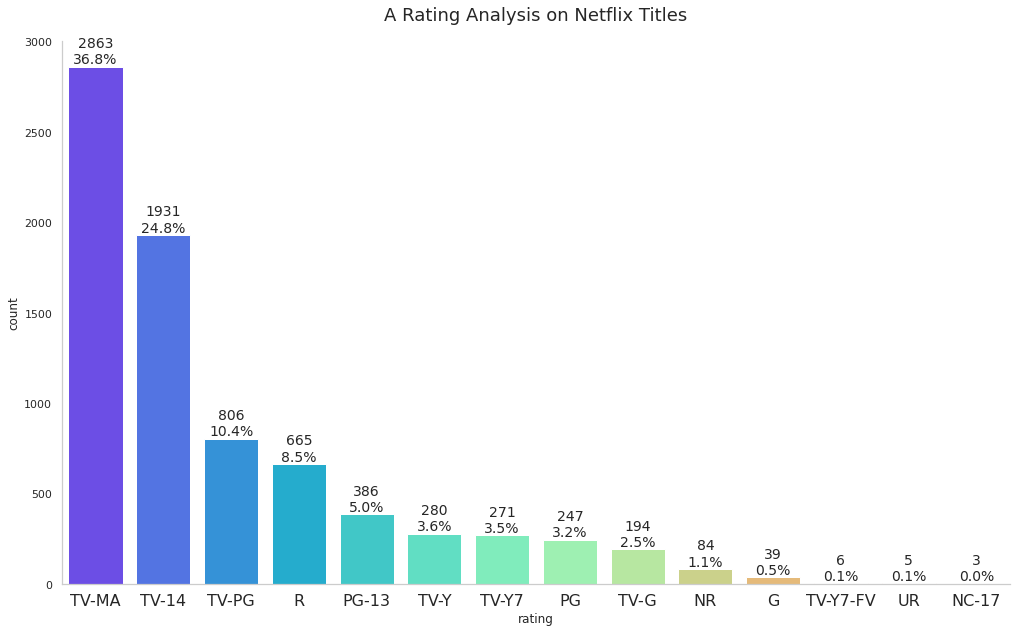

In [32]:
# Plotting and customizing a rating analysis
plot_countplot(df, 'rating', order=True, figsize=(17, 10),
               title='A Rating Analysis on Netflix Titles', size_title=18)
plt.xticks(fontsize=16)
plt.show()

Let's break the count analysis by title type.

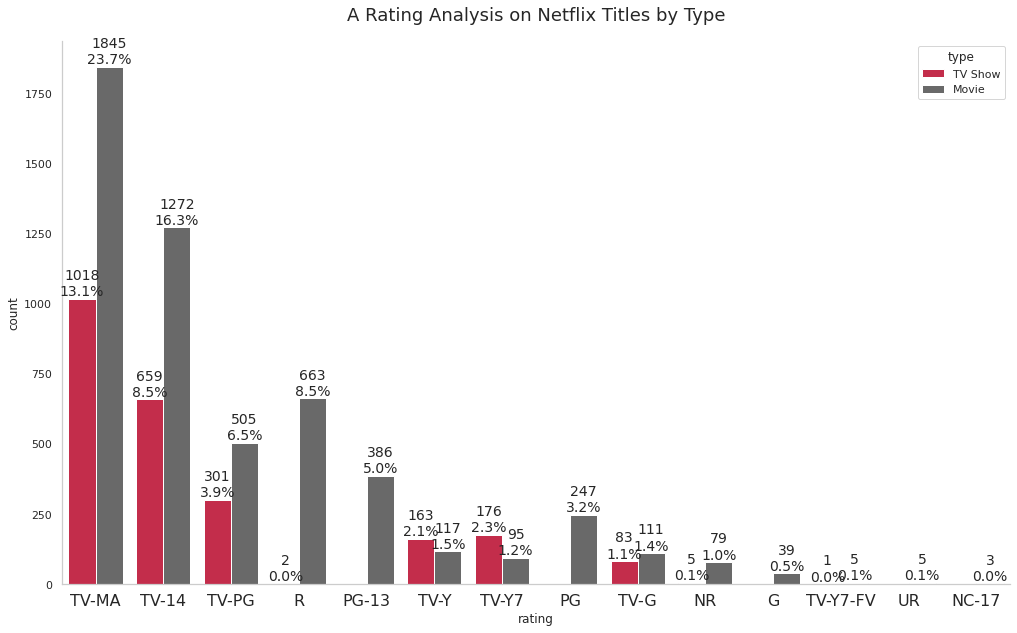

In [33]:
# Plotting and customizing a rating analysis
plot_countplot(df, 'rating', hue='type', order=True, figsize=(17, 10), palette=['crimson', 'dimgrey'],
               title='A Rating Analysis on Netflix Titles by Type', size_title=18)
plt.xticks(fontsize=16)
plt.show()

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Prep: Transforming the Data for a More Insights</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

After extracting useful insights from data on a really extensive session with beautiful and insightful charts, let's purpose a new section for applying transformation on the raw data in order to create new columns and maybe be prepared for a further modeling step.

Who said we can't use this data for creating an unsupervised model for clustering titles and building a recommendation system? For making it formal, let's specify a wall of transformations that could be made using the data available. There are some new features that really could be used on relevant analysis.


<a id="4.1"></a>
<font color="dimgrey" size=+2.0><b>4.1 New Features From "type" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

___
`type`
- Encoding for creating new columns for *movies* and *tv shows*
___  

In [34]:
# Applying encoding on raw data
type_encoding = pd.get_dummies(df['type'])
df_type = df.merge(type_encoding, left_index=True, right_index=True)

# Dropping old column
df_type.drop('type', axis=1, inplace=True)
df_type.loc[:, ['title', 'Movie', 'TV Show']].head()

title  Movie  TV Show
0     3%      0        1
1   7:19      1        0
2  23:59      1        0
3      9      1        0
4     21      1        0

<a id="4.2"></a>
<font color="dimgrey" size=+2.0><b>4.2 New Features From "director" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

___  
`director`
- Extracting the top N directors and making a categorical grouping
    * **Idea:** apply encoding after limiting the categorical entries through top N extraction
    * **Idea:** create an unique flag for saying if title's director are (1) or aren't (0) from top N
___

In [35]:
# Defining a function for extracting top N from a column
top10_dir = list(df_type['director'].value_counts()[:10].index)
top50_dir = list(df_type['director'].value_counts()[:50].index)
top100_dir = list(df_type['director'].value_counts()[:100].index)

# Creating a copy of previous DataFrame for keeping log of transformations
df_dir = df_type.copy()

# Creating flags for top directors
df_dir['is_top10_director'] = df_dir['director'].apply(lambda x: 1 if x in top10_dir else 0)
df_dir['is_top50_director'] = df_dir['director'].apply(lambda x: 1 if x in top50_dir else 0)
df_dir['is_top100_director'] = df_dir['director'].apply(lambda x: 1 if x in top100_dir else 0)
df_dir['top_director_sum'] = df_dir['is_top10_director'] + df_dir['is_top50_director'] + df_dir['is_top100_director']
df_dir['is_top_director'] = df_dir['top_director_sum'].apply(lambda x: 1 if x > 0 else x)

# Results
df_dir.loc[10:20, ['title', 'director', 'is_top_director', 'is_top10_director', 'is_top50_director', 
                   'is_top100_director']]

title              director  is_top_director  \
10                  1922          Zak Hilditch                0   
11                  1983                   NaN                0   
12                  1994  Diego Enrique Osorno                0   
13                 2,215   Nottapon Boonprakob                0   
14                  3022            John Suits                0   
15                Oct-01        Kunle Afolayan                1   
16                Feb-09                   NaN                0   
17                22-Jul       Paul Greengrass                0   
18                15-Aug    Swapnaneel Jayakar                0   
19                   '89                   NaN                0   
20  ​​Kuch Bheege Alfaaz                  Onir                0   

    is_top10_director  is_top50_director  is_top100_director  
10                  0                  0                   0  
11                  0                  0                   0  
12                  0                  0                   0  
13                  0                  0                   0  
14                  0                  0                   0  
15                  0                  1                   1  
16                  0                  0                   0  
17                  0                  0                   0  
18                  0                  0                   0  
19                  0                  0                   0  
20                  0                  0                   0

<a id="4.3"></a>
<font color="dimgrey" size=+2.0><b>4.3 New Features From "cast" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

___    
`cast`
- Counting how many people are part of title's cast
    * **Idea:** extract a list for each index and counting the elements (people) on this list for each line
- Extracting top N actors and making a categorical grouping
    * **Idea:** apply encoding after limiting the categorical entries through top N extracting
    * **Idea:** create an unique column for storing the count of how many people on title cast are part of top N
___

In [36]:
# Creating a copy of previous DataFrame for keeping log of transformations
df_cast = df_dir.copy()

# Extracting how many people are part of the show
df_cast['cast_list'] = df_cast['cast'].fillna('').apply(lambda x: x.split(','))
df_cast['people_on_cast'] = df_cast['cast_list'].apply(lambda x: len(x))

# Deleting auxiliar cast list column
df_cast.drop('cast_list', axis=1, inplace=True)

# Results
df_cast.loc[:5, ['title', 'cast', 'people_on_cast']]

title                                               cast  people_on_cast
0     3%  João Miguel, Bianca Comparato, Michel Gomes, R...              11
1   7:19  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...               6
2  23:59  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...               9
3      9  Elijah Wood, John C. Reilly, Jennifer Connelly...               9
4     21  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...              12
5     46  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...              10

Ok, very nice! The `people_on_cast` feature is one of those we took a look before. Let's now improve this "feature extraction" process by extracting a list of top 10, top 30 and top 50 actors with most participation on titles. After that, we will look on each title's cast and count how many actors and actresses are part of the top 10, 30 or 50 list.

Let's try to build this.

In [37]:
# Extracting a list from cast column
cast_list = extract_list_from_string(''.join(list(df_prep['cast'].fillna(' ').values)))

# Extracting top 10, 30 and 50 actors from cast list
top_actors = pd.DataFrame(cast_list, columns=['actor'])
top10_actors = top_actors.head(10)['actor'].values
top30_actors = top_actors.head(30)['actor'].values
top50_actors = top_actors.head(50)['actor'].values

# Defining a function for counting how many actors are on top list
def count_actors_on_top_list(cast_list, top_actors_list):
    try:
        return len([act for act in cast_list if act in top_actors_list])
    except TypeError as te:
        return 0

# Returning the new features
df_cast['actors_on_top10_cast'] = df_cast['cast'].apply(lambda x: count_actors_on_top_list(extract_list_from_string(x), top10_actors))
df_cast['actors_on_top30_cast'] = df_cast['cast'].apply(lambda x: count_actors_on_top_list(extract_list_from_string(x), top30_actors))
df_cast['actors_on_top50_cast'] = df_cast['cast'].apply(lambda x: count_actors_on_top_list(extract_list_from_string(x), top50_actors))

# Results
df_cast.sort_values(by='actors_on_top50_cast', ascending=False).head().loc[:, ['title', 'cast', 
                                                                               'people_on_cast', 
                                                                               'actors_on_top10_cast', 
                                                                               'actors_on_top30_cast',
                                                                               'actors_on_top50_cast']]

title  \
2041                Even the Rain   
3248      Just Another Love Story   
3221       Joseph: King of Dreams   
3840  Mad Ron's Prevues from Hell   
7113         To and From New York   

                                                   cast  people_on_cast  \
2041  Luis Tosar, Gael García Bernal, Juan Carlos Ad...              12   
3248  Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...              12   
3221  Ben Affleck, Mark Hamill, Richard Herd, Mauree...              15   
3840  Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...              10   
7113  Barbara King, Shaana Diya, John Krisiukenas, Y...               6   

      actors_on_top10_cast  actors_on_top30_cast  actors_on_top50_cast  
2041                     0                     0                    10  
3248                     4                    10                    10  
3221                     0                     0                     8  
3840                     0                     8                     8  
7113                     5                     5                     5

The new three columns available contain information about how many actors on cast are part on top 10, 30 or 50 cast list. It could be a good one for further analysis.

<a id="4.4"></a>
<font color="dimgrey" size=+2.0><b>4.4 New Features From "country" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

___
`country`
- Extracting the continent of the title by country name using *pycountry*
- Extracting top N countries and making a categorical grouping
    * **Idea:** apply encoding after limiting the categorical entries through top N extraction
    * **Idea:** create an unique flag for saying if title's country are (1) or aren't (0) from top N
___

In [38]:
# Making a copy of the data
df_country = df_cast.copy()

# Extracting how many countries the title are part
df_country['country_list'] = df_country['country'].fillna('').apply(lambda x: x.split(','))
df_country['num_countries'] = df_country['country_list'].apply(lambda x: len(x))

# Extracting a unique list of countries
country_list = extract_list_from_string(','.join(list(df['country'].fillna('Unknown').values)))
countries_info = pd.DataFrame(pd.DataFrame(country_list, columns=['country_name']).value_counts())
countries_info.reset_index(inplace=True)
countries_info.columns = ['country_name', 'num_titles']

# Joining with country codes from pycountry-convert
countries_info['codes'] = countries_info['country_name'].apply(lambda x: get_country_info(x))
countries_info['continent'] = countries_info['codes'].apply(lambda x: x[2])

# Joining with source dataset
df_country = df_country.merge(countries_info.loc[:, ['country_name', 'continent']], 
                              how='left', left_on='country', right_on='country_name')

# Null values on new continent column are from titles assigned for more than 1 country
df_country.loc[:, ['continent']] = df_country.loc[:, ['continent']].fillna('Multiple')

# Finally encoding the new continen column
countries_encoded = pd.get_dummies(df_country['continent'], prefix='continent')
df_country = df_country.merge(countries_encoded, how='left', left_index=True, right_index=True)

# Dropping auxiliar columns
df_country.drop(['country_list', 'country_name', 'continent'], axis=1, inplace=True)

# Results
country_new_features = ['continent_AF', 'continent_AS', 'continent_EU', 'continent_Multiple',
                        'continent_NA', 'continent_OC', 'continent_SA', 'continent_Unknown']
df_country.loc[:5, ['title', 'country'] + country_new_features]

title        country  continent_AF  continent_AS  continent_EU  \
0     3%         Brazil             0             0             0   
1   7:19         Mexico             0             0             0   
2  23:59      Singapore             0             1             0   
3      9  United States             0             0             0   
4     21  United States             0             0             0   
5     46         Turkey             0             1             0   

   continent_Multiple  continent_NA  continent_OC  continent_SA  \
0                   0             0             0             1   
1                   0             1             0             0   
2                   0             0             0             0   
3                   0             1             0             0   
4                   0             1             0             0   
5                   0             0             0             0   

   continent_Unknown  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0

Wow nice! We just used the source `country` column on the dataset for extracting useful information about the continent with dummies encoding already applied. Those features combo good be important for further analysis, recommendation system or clusters creation from titles! Additionaly, we created a step for handling titles with more than one column assigned (it is represented by `continent_multiple_country` encoded feature).

Now let's try to extract something similar we did on cast features and build up a code for looking the top 3, top 5 and top 10 countries for creating new features.

In [39]:
# Extracting top N countries list
top3_countries = countries_info.query('country_name != "Unknown"').head(3)['country_name'].values
top5_countries = countries_info.query('country_name != "Unknown"').head(5)['country_name'].values
top10_countries = countries_info.query('country_name != "Unknown"').head(10)['country_name'].values

# Defining a function for counting how many actors are on top list
def flag_country_on_top(country_list, top_country_list):
    try:
        return len([c for c in country_list if c in top_country_list])
    except TypeError as te:
        return 0

# Returning the new features
df_country['country_on_top3'] = df_country['country'].apply(lambda x: flag_country_on_top(extract_list_from_string(x), top3_countries))
df_country['country_on_top5'] = df_country['country'].apply(lambda x: flag_country_on_top(extract_list_from_string(x), top5_countries))
df_country['country_on_top10'] = df_country['country'].apply(lambda x: flag_country_on_top(extract_list_from_string(x), top10_countries))

# Results
df_country.head().loc[:, ['title', 'country', 'country_on_top3', 'country_on_top5', 'country_on_top10']]

title        country  country_on_top3  country_on_top5  country_on_top10
0     3%         Brazil                0                0                 0
1   7:19         Mexico                0                0                 1
2  23:59      Singapore                0                0                 0
3      9  United States                1                1                 1
4     21  United States                1                1                 1

We reacher our goal by extracting some useful features from country column. With those ones, we can clearly see from which continent a Netflix title are from and beyond this we can see if the original country of the title are one of the tops in terms of presence on Netflix catalog.

Now let's dive into `date_added` column for looking for new features based on date transformations.

<a id="4.5"></a>
<font color="dimgrey" size=+2.0><b>4.5 New Features From "date_added" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

___
`date_added`
- Extracting date features like:
    * Month the title was added on catalog
    * Quarter the title was added on catalog
    * Four-month the title was added on catalog
    * Semester the title was added on cataog
- Extracting the "title's age" variable by applying a date diff between the date the title was added on catalog and a date reference (snapshot) of the catalog itseld
    * Days on catalog
    * Months on catalog
    * Quarters on catalog
    * Semesters on catalog
    * Years on catalog
___
`release_year`
- Extracting the general age of the title
- Computing the difference between title release year and the year the title was added on catalog
    * **Idea:** create a flag column for saying if the title was added on catalog on the same year it was released (maybe this is a good proxy for relevant titles)
    * **Idea:** difference (in years) between release year and year the title was added on catalog 
___

In [40]:
# Making a copy of the last changed dataset
df_date = df_country.copy()

# Result cols
date_cols = ['title', 'date_added', 'day_added', 'month_added', 'year_added', 'quarter_added', 
             'semester_added', 'days_on_catalog', 'months_on_catalog', 'years_on_catalog', 'release_year', 
             'title_age_years']

# Transforming the date add column into a datetime format
df_date['dt_added'] = pd.to_datetime(df_date['date_added'])
df_date['day_added'] = df_date['dt_added'].apply(lambda x: x.day)
df_date['month_added'] = df_date['dt_added'].apply(lambda x: x.month)
df_date['year_added'] = df_date['dt_added'].apply(lambda x: x.year)
df_date['quarter_added'] = df_date['month_added'].apply(lambda x: np.ceil(x / 4))
df_date['semester_added'] = df_date['month_added'].apply(lambda x: 1 if x <= 6 else 2)

# Setting snapshot date
df_date['catalog_date'] = df_date['dt_added'].max()

# Computing relative deltas between date added and actual date
df_date['days_on_catalog'] = (df_date['catalog_date'] - df_date['dt_added']).dt.days
df_date['months_on_catalog'] = df_date['days_on_catalog'].apply(lambda x: round(x / 30, 0))
df_date['years_on_catalog'] = df_date['months_on_catalog'].apply(lambda x: np.floor(x / 12))
df_date['title_age_years'] = df_date['catalog_date'].dt.year - df_date['release_year']

# Results
df_date.head(10).loc[:, date_cols]

title         date_added  day_added  month_added  year_added  \
0     3%    August 14, 2020       14.0          8.0      2020.0   
1   7:19  December 23, 2016       23.0         12.0      2016.0   
2  23:59  December 20, 2018       20.0         12.0      2018.0   
3      9  November 16, 2017       16.0         11.0      2017.0   
4     21    January 1, 2020        1.0          1.0      2020.0   
5     46       July 1, 2017        1.0          7.0      2017.0   
6    122       June 1, 2020        1.0          6.0      2020.0   
7    187   November 1, 2019        1.0         11.0      2019.0   
8    706      April 1, 2019        1.0          4.0      2019.0   
9   1920  December 15, 2017       15.0         12.0      2017.0   

   quarter_added  semester_added  days_on_catalog  months_on_catalog  \
0            2.0               2            155.0                5.0   
1            3.0               2           1485.0               50.0   
2            3.0               2            758.0               25.0   
3            3.0               2           1157.0               39.0   
4            1.0               1            381.0               13.0   
5            2.0               2           1295.0               43.0   
6            2.0               1            229.0                8.0   
7            3.0               2            442.0               15.0   
8            1.0               1            656.0               22.0   
9            3.0               2           1128.0               38.0   

   years_on_catalog  release_year  title_age_years  
0               0.0          2020                1  
1               4.0          2016                5  
2               2.0          2011               10  
3               3.0          2009               12  
4               1.0          2008               13  
5               3.0          2016                5  
6               0.0          2019                2  
7               1.0          1997               24  
8               1.0          2019                2  
9               3.0          2008               13

Now let's compute some additional features based on `release_year` column of the dataset. Basically, the idea is to iterate over Netflix catalog and see if the titles were added on catalog by the same year they were released - maybe it's a good proxy for "important" movies or TV Shows.

In [41]:
# Results cols
cat_date_cols = ['title', 'catalog_year', 'release_year', 'years_to_add_on_cat',
                 'added_on_release_year']

# New features
df_date['catalog_year'] = df_date['catalog_date'].apply(lambda x: x.year)
df_date['years_to_add_on_cat'] = df_date['catalog_year'] - df_date['release_year']
df_date['added_on_release_year'] = df_date['years_to_add_on_cat'].apply(lambda x: 1 if x == 0 else 0)

# Results
df_date.head().loc[:, cat_date_cols]

title  catalog_year  release_year  years_to_add_on_cat  \
0     3%          2021          2020                    1   
1   7:19          2021          2016                    5   
2  23:59          2021          2011                   10   
3      9          2021          2009                   12   
4     21          2021          2008                   13   

   added_on_release_year  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

Let's see some titles that were added on Netflix catalog by the same year they were released.

In [42]:
# Catalog addition on same year of release
df_date.sort_values(by='added_on_release_year', ascending=False).head().loc[:, cat_date_cols]

title  catalog_year  release_year  years_to_add_on_cat  \
2741            Hilda          2021          2021                    0   
5921  Surviving Death          2021          2021                    0   
4173          Monarca          2021          2021                    0   
5859      Stuck Apart          2021          2021                    0   
1285         Charming          2021          2021                    0   

      added_on_release_year  
2741                      1  
5921                      1  
4173                      1  
5859                      1  
1285                      1

Ok! Maybe in the future it would be nice to see titles that were added on catalog by the same year it were released. That could be a new proxy for even the movies or TV Shows provided by Netflix itself.

The next step will handle the extracting of features from `listed_in` column.

<a id="4.6"></a>
<font color="dimgrey" size=+2.0><b>4.6 New Features From "listed_in" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

___
`listed_in`
- Extracting the count of different genders the title is listed in
- Extracting top N title gender
    * **Idea:** apply encoding after limiting the categorical entries through top N extracting
    * **Idea:** create an unique column for storing the count of how many title's gender are part of top N
___

In [43]:
# Making another copy of the original dataframe
df_listed = df_date.copy()

# Results cols
listed_cols = ['title', 'listed_in', 'num_diff_types', 'top_listed_in',
               'listed_in_Dramas', 'listed_in_Independent Movies', 'listed_in_International Movies',
               'listed_in_Other']

# Extracting a list of different titles type
listed_in_list = extract_list_from_string(' '.join(list(df_listed['listed_in'].fillna('').values)))
df_listed['listed_in_list'] = df_listed['listed_in'].fillna('').apply(lambda x: x.split(','))
df_listed['num_diff_types'] = df_listed['listed_in_list'].apply(lambda x: len(x))

# Extracting the top listed in types
top_n = 5
top_listed_in = list(pd.DataFrame(listed_in_list, columns=['type']).value_counts().index[:top_n])
top_listed_in = [t[0] for t in top_listed_in]
df_listed['top_listed_in'] = df_listed['listed_in'].apply(lambda x: x if x in top_listed_in else 'Other')

# Applying encoding on top listed in elements
df_listed = df_listed.merge(pd.get_dummies(df_listed['top_listed_in'], prefix='listed_in'),
                            how='left', left_index=True, right_index=True)

# Results
df_listed.head().loc[:, listed_cols]

title                                          listed_in  num_diff_types  \
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...               3   
1   7:19                       Dramas, International Movies               2   
2  23:59                Horror Movies, International Movies               2   
3      9  Action & Adventure, Independent Movies, Sci-Fi...               3   
4     21                                             Dramas               1   

  top_listed_in  listed_in_Dramas  listed_in_Independent Movies  \
0         Other                 0                             0   
1         Other                 0                             0   
2         Other                 0                             0   
3         Other                 0                             0   
4        Dramas                 1                             0   

   listed_in_International Movies  listed_in_Other  
0                               0                1  
1                               0                1  
2                               0                1  
3                               0                1  
4                               0                0

By the time, we could extract some titles type from listed in column and encoding the top ones. Next let's use the `duration` column for extracting features from movies and TV Shows.

<a id="4.7"></a>
<font color="dimgrey" size=+2.0><b>4.7 New Features From "duration" Column</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [44]:
# Making a copy of the dataframe
df_duration = df_listed.copy()

# Result cols
dur_cols = ['title', 'duration', 'duration_num']

# Extracting numerical info for title duration
df_duration['duration_num'] = df_duration['duration'].apply(lambda x: int(x.split(' ')[0]))

# Results
df_duration.head().loc[:, dur_cols]

title   duration  duration_num
0     3%  4 Seasons             4
1   7:19     93 min            93
2  23:59     78 min            78
3      9     80 min            80
4     21    123 min           123

<a id="4.8"></a>
<font color="dimgrey" size=+2.0><b>4.8 Final Preparation</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

Ok. After doing a lot on feature extraction on this Netflix dataset, we built up a brand new dataset with features that can be used in some modeling step. On this last topic, we will split the whole data into two dataframes:

- A movies dataframe;
- A TV Show dataframe;

The idea is to get close to these two types of titles on Netflix catalog and maybe construct a clustering model to take a deeper look on those. Maybe we can find some new insights on how movies and TV shows can be grouped using unsupervised approaches.

In [45]:
# Splitting data by its type
movies = df_duration[df_duration['Movie'] == 1]
tvshows = df_duration[df_duration['TV Show'] == 1]

# Columns to be dropped
to_drop = ['title', 'show_id', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 
           'dt_added', 'catalog_date', 'catalog_year', 'listed_in', 'description', 'listed_in_list', 
           'top_listed_in', 'year_added', 'Movie', 'TV Show', 'release_year']

# Dropping columns
X_movies = movies.drop(to_drop, axis=1)
X_tvshows = tvshows.drop(to_drop, axis=1).dropna()

# Preview of dataframes
print(f'Shape of movies data: {X_movies.shape}')
print(f'Shape of tv shows data: {X_tvshows.shape}')

X_movies.head()

Shape of movies data: (5377, 38)
Shape of tv shows data: (2400, 38)


is_top10_director  is_top50_director  is_top100_director  top_director_sum  \
1                  0                  0                   0                 0   
2                  0                  0                   0                 0   
3                  0                  0                   0                 0   
4                  0                  0                   1                 1   
6                  0                  0                   0                 0   

   is_top_director  people_on_cast  actors_on_top10_cast  \
1                0               6                     0   
2                0               9                     0   
3                0               9                     0   
4                1              12                     0   
6                0               8                     0   

   actors_on_top30_cast  actors_on_top50_cast  num_countries  ...  \
1                     0                     0              1  ...   
2                     0                     0              1  ...   
3                     0                     0              1  ...   
4                     0                     0              1  ...   
6                     0                     0              1  ...   

   title_age_years  years_to_add_on_cat  added_on_release_year  \
1                5                    5                      0   
2               10                   10                      0   
3               12                   12                      0   
4               13                   13                      0   
6                2                    2                      0   

   num_diff_types  listed_in_Dramas  listed_in_Independent Movies  \
1               2                 0                             0   
2               2                 0                             0   
3               3                 0                             0   
4               1                 1                             0   
6               2                 0                             0   

   listed_in_International Movies  listed_in_International TV Shows  \
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   
6                               0                                 0   

   listed_in_Other  duration_num  
1                1            93  
2                1            78  
3                1            80  
4                0           123  
6                1            95  

[5 rows x 38 columns]

With this we can finish this intensive preparation step. At the end, we built a very intuitive dataset for each title type: movies and TV shows. After this, let's explore the application of a clustering algorithm for creating new groups for movies and TV shows to better understanding how titles can be grouped in a multidimensional space.

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. PCA: Reducing the Multidimensional Space</b></font>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

As a preprocessing step for a further clustering algorithm, let's take our almost 40-dimensional data and reduce its dimensionality for looking at it in a 2D or maybe 3D perspective. Maybe it could be a good improvement for a further KMeans algorithm.

For this, let's use the `PCA` algorithm from sklearn and make the reducting for either DataFrames for movies and tv shows.

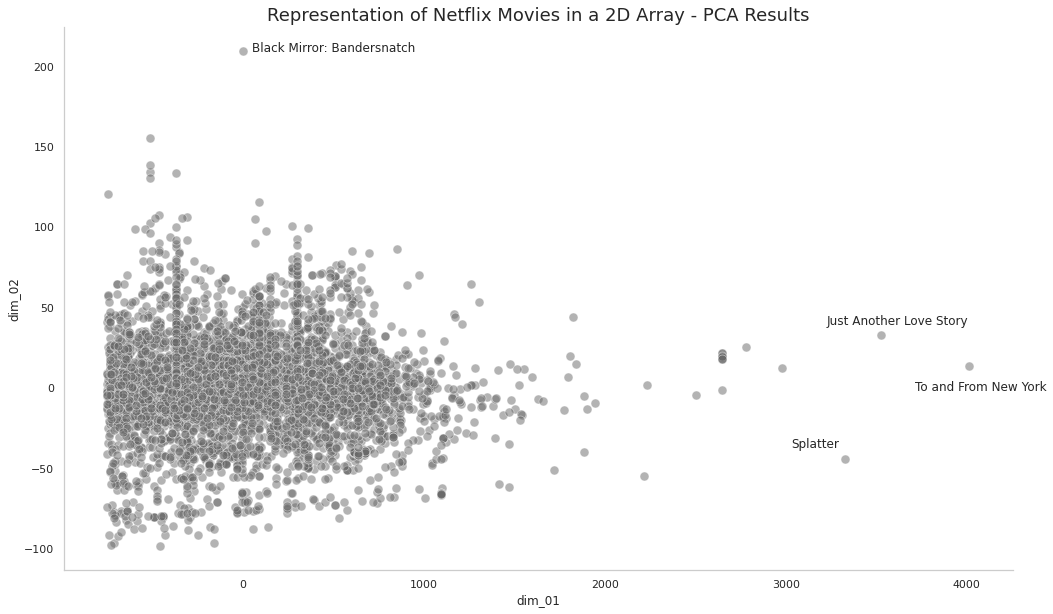

In [46]:
# Importing libraries
from sklearn.decomposition import PCA
from xplotter.formatter import format_spines

# Creating a PCA with 2 components
pca = PCA(n_components=2)
X_movies_2d = pca.fit_transform(X_movies)
X_movies_2d = pd.DataFrame(X_movies_2d, columns=['dim_01', 'dim_02'])

# Plotting the new 2D data
fig, ax = plt.subplots(figsize=(17, 10))
sns.scatterplot(x='dim_01', y='dim_02', data=X_movies_2d, alpha=.5, color='dimgrey', s=80)

# Customizing chart
format_spines(ax)
ax.set_title('Representation of Netflix Movies in a 2D Array - PCA Results', size=18)

# Sorting movies by dim 01
sorted_movies_dim01 = X_movies_2d.sort_values(by='dim_01', ascending=False)
sorted_movies_dim02 = X_movies_2d.sort_values(by='dim_02', ascending=False)

# Retrieving top 3 movies by dim 01
top01_dim01_movie = movies.iloc[sorted_movies_dim01.index[0], :].title
top02_dim01_movie = movies.iloc[sorted_movies_dim01.index[1], :].title
top03_dim01_movie = movies.iloc[sorted_movies_dim01.index[2], :].title

# Retrieving top 1 movies by dim 02
top01_dim02_movie = movies.iloc[sorted_movies_dim02.index[0], :].title

# Making annotations
ax.annotate(top01_dim01_movie, xy=(sorted_movies_dim01['dim_01'].values[0]-300, 
                                   sorted_movies_dim01['dim_02'].values[0]-15), xycoords='data')
ax.annotate(top02_dim01_movie, xy=(sorted_movies_dim01['dim_01'].values[1]-300, 
                                   sorted_movies_dim01['dim_02'].values[1]+7), xycoords='data')
ax.annotate(top03_dim01_movie, xy=(sorted_movies_dim01['dim_01'].values[2]-300, 
                                   sorted_movies_dim01['dim_02'].values[2]+7), xycoords='data')
ax.annotate(top01_dim02_movie, xy=(sorted_movies_dim02['dim_01'].values[0]+50, 
                                   sorted_movies_dim02['dim_02'].values[0]), xycoords='data')

plt.show()

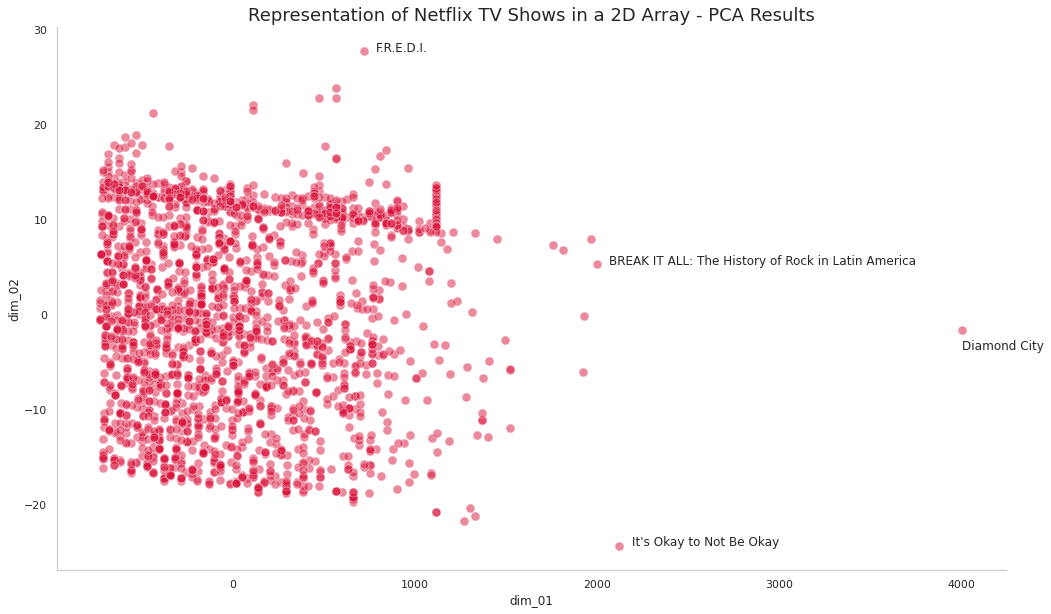

In [47]:
# Creating a PCA with 2 components
pca = PCA(n_components=2)
X_tvshows_2d = pca.fit_transform(X_tvshows)
X_tvshows_2d = pd.DataFrame(X_tvshows_2d, columns=['dim_01', 'dim_02'])

# Plotting the new 2D data
fig, ax = plt.subplots(figsize=(17, 10))
sns.scatterplot(x='dim_01', y='dim_02', data=X_tvshows_2d, alpha=.5, color='crimson', s=80)

# Customizing chart
format_spines(ax)
ax.set_title('Representation of Netflix TV Shows in a 2D Array - PCA Results', size=18)

# Sorting movies by dim 01
sorted_tvshows_dim01 = X_tvshows_2d.sort_values(by='dim_01', ascending=False)
sorted_tvshows_dim02 = X_tvshows_2d.sort_values(by='dim_02', ascending=False)

# Retrieving top 3 movies by dim 01
top01_dim01_tvshow = tvshows.iloc[sorted_tvshows_dim01.index[0], :].title
top02_dim01_tvshow = tvshows.iloc[sorted_tvshows_dim01.index[1], :].title
top03_dim01_tvshow = tvshows.iloc[sorted_tvshows_dim01.index[2], :].title

# Retrieving top 1 movies by dim 02
top01_dim02_tvshow = movies.iloc[sorted_tvshows_dim02.index[0], :].title

# Making annotations
ax.annotate(top01_dim01_tvshow, xy=(sorted_tvshows_dim01['dim_01'].values[0], 
                                   sorted_tvshows_dim01['dim_02'].values[0]-2), xycoords='data')
ax.annotate(top02_dim01_tvshow, xy=(sorted_tvshows_dim01['dim_01'].values[1]+70, 
                                   sorted_tvshows_dim01['dim_02'].values[1]), xycoords='data')
ax.annotate(top03_dim01_tvshow, xy=(sorted_tvshows_dim01['dim_01'].values[2]+70, 
                                   sorted_tvshows_dim01['dim_02'].values[2]), xycoords='data')
ax.annotate(top01_dim02_tvshow, xy=(sorted_tvshows_dim02['dim_01'].values[0]+70, 
                                   sorted_tvshows_dim02['dim_02'].values[0]), xycoords='data')

plt.show()